# Model Classification
# GBoost and NN for Crop type

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Gboost" data-toc-modified-id="Gboost-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gboost</a></span></li><li><span><a href="#Neural-Netwok" data-toc-modified-id="Neural-Netwok-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Neural Netwok</a></span></li></ul></div>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#DataViz
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Preprocessing

In [50]:
df_no_null = pd.read_csv('../data/GHISACONUS_2008_001_speclib.csv')

In [51]:
df_no_null.dropna(axis = 1, how = 'all', inplace= True)

In [53]:
df_no_null.dropna(inplace= True)

In [54]:
features = [col for col in df_no_null.columns if col.startswith('X')]

In [91]:
df_no_null['Crop'] = df_no_null['Crop'].astype('category').cat.codes

In [183]:
X = df_no_null[features]
y = df_no_null['Crop']

In [184]:
X.shape, y.shape

((6933, 131), (6933,))

In [185]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1, stratify=y)

## Gboost

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gboost_class = GradientBoostingClassifier(n_estimators=100,
                                          learning_rate=1.0,
                                          max_depth=1,
                                          random_state=0).fit(X_train, y_train)

gboost_class.score(X_test, y_test)

0.7115384615384616

In [60]:
gboost_class.score(X_train, y_train), gboost_class.score(X_test, y_test)

(0.794671644323774, 0.7115384615384616)

In [61]:
from sklearn.model_selection import cross_val_score, GridSearchCV   #Perforing grid search
from sklearn import metrics

In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.1, 0.2, 0.3, 0.5],
    "min_samples_split": np.linspace(0.1, 0.7, 12),
    "min_samples_leaf": np.linspace(0.1, 0.7, 12),
    "max_depth":[10, 15, 20],
    "max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.6, 0.8, 0.9, 1.0],
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-2)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(clf.best_params_)

In [70]:
X_train.shape

(5893, 131)

In [110]:
y.value_counts()

0    2599
3    2061
4    1340
1     819
2     114
Name: Crop, dtype: int64

## Neural Netwok

In [120]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [187]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_y)

In [188]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.15, random_state = 1, stratify=y)

In [210]:
Z_train, Z_test, z_train, z_test = train_test_split(X, y, test_size = 0.15, random_state = 1, stratify=y)

In [136]:
input_dim = len(X_train.columns)

model = Sequential()
model.add(Dense(8, input_dim = input_dim , activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(X_train, y_train, epochs = 100, batch_size = 15)

scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/100
393/393 [==============================] - 1s 617us/step - loss: 1.6466 - accuracy: 0.3381
Epoch 2/100
393/393 [==============================] - 0s 601us/step - loss: 1.2929 - accuracy: 0.3782
Epoch 3/100
393/393 [==============================] - 0s 612us/step - loss: 1.2517 - accuracy: 0.4366
Epoch 4/100
393/393 [==============================] - 0s 602us/step - loss: 1.2421 - accuracy: 0.4276
Epoch 5/100
393/393 [==============================] - 0s 597us/step - loss: 1.2177 - accuracy: 0.4429
Epoch 6/100
393/393 [==============================] - 0s 606us/step - loss: 1.1960 - accuracy: 0.4469
Epoch 7/100
393/393 [==============================] - 0s 601us/step - loss: 1.1896 - accuracy: 0.4593
Epoch 8/100
393/393 [==============================] - 0s 602us/step - loss: 1.1822 - accuracy: 0.4524
Epoch 9/100
393/393 [==============================] - 0s 608us/step - loss: 1.1835 - accuracy: 0.4406
Epoch 10/100
393/393 [==============================] - 0s 596us/step - l

In [138]:
from keras.wrappers.scikit_learn import KerasClassifier

In [144]:
def model_func(layer_one_neurons = 8, layer_two_neurons = 8, layer_three_neurons = 8):
    model = Sequential()
    #layer 1
    model.add(Dense(layer_one_neurons,
                   activation = 'relu',
                   input_dim = input_dim))

    #layer 2
    model.add(Dense(layer_two_neurons, activation = 'relu'))
    
    #layer 3
    model.add(Dense(layer_three_neurons, activation = 'relu'))

    #output layer
    model.add(Dense(5, activation = 'softmax'))

    #Compile model
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

    return model

nn = KerasClassifier(build_fn = model_func, batch_size =  512, epochs = 10, verbose = 1)

params = {'layer_one_neurons': [16 ,32, 64],
         'layer_two_neurons': [32, 64, 128],
          'layer_three_neurons': [32, 64, 128],
         'batch_size': [512, 1024],
         'epochs': [50, 100, 150]}

gs = GridSearchCV (nn, params, cv = 3)

gs.fit(X_train, y_train)

print (gs.best_score_)
gs.best_params_

Epoch 1/50
8/8 [==============================] - 0s 1ms/step - loss: 4.1679 - accuracy: 0.2209
Epoch 2/50
8/8 [==============================] - 0s 972us/step - loss: 1.7766 - accuracy: 0.2636
Epoch 3/50
8/8 [==============================] - 0s 1ms/step - loss: 1.4654 - accuracy: 0.3820
Epoch 4/50
8/8 [==============================] - 0s 944us/step - loss: 1.3564 - accuracy: 0.3015
Epoch 5/50
8/8 [==============================] - 0s 1ms/step - loss: 1.2785 - accuracy: 0.3390
Epoch 6/50
8/8 [==============================] - 0s 1ms/step - loss: 1.2192 - accuracy: 0.4174
Epoch 7/50
8/8 [==============================] - 0s 1ms/step - loss: 1.2083 - accuracy: 0.4085
Epoch 8/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1627 - accuracy: 0.4404
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 1.1272 - accuracy: 0.4767
Epoch 10/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1117 - accuracy: 0.4816
Epoch 11/50
8/8 [==================

8/8 [==============================] - 0s 1ms/step - loss: 2.9118 - accuracy: 0.3242
Epoch 3/50
8/8 [==============================] - 0s 1ms/step - loss: 1.8245 - accuracy: 0.3271
Epoch 4/50
8/8 [==============================] - 0s 1ms/step - loss: 1.4277 - accuracy: 0.4359
Epoch 5/50
8/8 [==============================] - 0s 1ms/step - loss: 1.3424 - accuracy: 0.4499
Epoch 6/50
8/8 [==============================] - 0s 1ms/step - loss: 1.2776 - accuracy: 0.4342
Epoch 7/50
8/8 [==============================] - 0s 1ms/step - loss: 1.2231 - accuracy: 0.4610
Epoch 8/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1939 - accuracy: 0.4923
Epoch 9/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1684 - accuracy: 0.5157
Epoch 10/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1605 - accuracy: 0.5121
Epoch 11/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1496 - accuracy: 0.5075
Epoch 12/50
8/8 [==============================] 

8/8 [==============================] - 0s 1ms/step - loss: 0.9348 - accuracy: 0.6398
Epoch 18/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9382 - accuracy: 0.6320
Epoch 19/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9552 - accuracy: 0.5968
Epoch 20/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9567 - accuracy: 0.5926
Epoch 21/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9171 - accuracy: 0.6371
Epoch 22/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9059 - accuracy: 0.6484
Epoch 23/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8973 - accuracy: 0.6498
Epoch 24/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8895 - accuracy: 0.6616
Epoch 25/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8853 - accuracy: 0.6604
Epoch 26/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9017 - accuracy: 0.6449
Epoch 27/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.9309 - accuracy: 0.6071
Epoch 34/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9401 - accuracy: 0.5945
Epoch 35/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9343 - accuracy: 0.6011
Epoch 36/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9400 - accuracy: 0.5956
Epoch 37/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9143 - accuracy: 0.5964
Epoch 38/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9172 - accuracy: 0.6079
Epoch 39/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9200 - accuracy: 0.6149
Epoch 40/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9067 - accuracy: 0.6120
Epoch 41/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9036 - accuracy: 0.6133
Epoch 42/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9129 - accuracy: 0.6160
Epoch 43/50
8/8 [=========================

Epoch 16/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9533 - accuracy: 0.6126
Epoch 17/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9406 - accuracy: 0.6119
Epoch 18/50
8/8 [==============================] - 0s 3ms/step - loss: 0.9352 - accuracy: 0.6187
Epoch 19/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9415 - accuracy: 0.6112
Epoch 20/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9222 - accuracy: 0.6146
Epoch 21/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8976 - accuracy: 0.6344
Epoch 22/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8848 - accuracy: 0.6499
Epoch 23/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8855 - accuracy: 0.6421
Epoch 24/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8808 - accuracy: 0.6468
Epoch 25/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8797 - accuracy: 0.6501
Epoch 26/50
8/8 [=============

8/8 [==============================] - 0s 1ms/step - loss: 0.9065 - accuracy: 0.6370
Epoch 32/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9118 - accuracy: 0.6322
Epoch 33/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8939 - accuracy: 0.6479
Epoch 34/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8926 - accuracy: 0.6450
Epoch 35/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8811 - accuracy: 0.6471
Epoch 36/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8773 - accuracy: 0.6429
Epoch 37/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8654 - accuracy: 0.6543
Epoch 38/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8811 - accuracy: 0.6495
Epoch 39/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8466 - accuracy: 0.6675
Epoch 40/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8356 - accuracy: 0.6720
Epoch 41/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 1.0796 - accuracy: 0.5753
Epoch 15/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0700 - accuracy: 0.5852
Epoch 16/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0752 - accuracy: 0.5621
Epoch 17/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0578 - accuracy: 0.5606
Epoch 18/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0532 - accuracy: 0.5608
Epoch 19/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0231 - accuracy: 0.6025
Epoch 20/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0115 - accuracy: 0.6038
Epoch 21/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0100 - accuracy: 0.5986
Epoch 22/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0037 - accuracy: 0.5818
Epoch 23/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9969 - accuracy: 0.5971
Epoch 24/50
8/8 [=========================

Epoch 30/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8292 - accuracy: 0.6590
Epoch 31/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8172 - accuracy: 0.6683
Epoch 32/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8023 - accuracy: 0.6708
Epoch 33/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8153 - accuracy: 0.6740
Epoch 34/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8286 - accuracy: 0.6591
Epoch 35/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7943 - accuracy: 0.6769
Epoch 36/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7826 - accuracy: 0.6842
Epoch 37/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7717 - accuracy: 0.6843
Epoch 38/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7630 - accuracy: 0.6928
Epoch 39/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7715 - accuracy: 0.6892
Epoch 40/50
8/8 [=============

8/8 [==============================] - 0s 1ms/step - loss: 0.8538 - accuracy: 0.6498
Epoch 46/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8266 - accuracy: 0.6695
Epoch 47/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8318 - accuracy: 0.6668
Epoch 48/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8318 - accuracy: 0.6666
Epoch 49/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8343 - accuracy: 0.6568
Epoch 50/50
4/4 [==============================] - 0s 1ms/step - loss: 0.8290 - accuracy: 0.6650
Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 12.4336 - accuracy: 0.3209
Epoch 2/50
8/8 [==============================] - 0s 1ms/step - loss: 3.2623 - accuracy: 0.2973
Epoch 3/50
8/8 [==============================] - 0s 1ms/step - loss: 1.8279 - accuracy: 0.3383
Epoch 4/50
8/8 [==============================] - 0s 1ms/step - loss: 1.4857 - accuracy: 0.4193
Epoch 5/50
8/8 [=============================

8/8 [==============================] - 0s 1ms/step - loss: 0.7860 - accuracy: 0.6945
Epoch 29/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8132 - accuracy: 0.6713
Epoch 30/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7902 - accuracy: 0.6903
Epoch 31/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7776 - accuracy: 0.7039
Epoch 32/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7850 - accuracy: 0.6978
Epoch 33/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7716 - accuracy: 0.6838
Epoch 34/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7355 - accuracy: 0.7146
Epoch 35/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7526 - accuracy: 0.7055
Epoch 36/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.7062
Epoch 37/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7694 - accuracy: 0.6963
Epoch 38/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.9645 - accuracy: 0.6408
Epoch 12/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9499 - accuracy: 0.6565
Epoch 13/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9402 - accuracy: 0.6534
Epoch 14/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9192 - accuracy: 0.6515
Epoch 15/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9264 - accuracy: 0.6558
Epoch 16/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9091 - accuracy: 0.6680
Epoch 17/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9312 - accuracy: 0.6319
Epoch 18/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9214 - accuracy: 0.6502
Epoch 19/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8731 - accuracy: 0.6701
Epoch 20/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8796 - accuracy: 0.6639
Epoch 21/50
8/8 [=========================

8/8 [==============================] - 0s 952us/step - loss: 1.0504 - accuracy: 0.5637
Epoch 26/50
8/8 [==============================] - 0s 974us/step - loss: 1.0390 - accuracy: 0.5718
Epoch 27/50
8/8 [==============================] - 0s 951us/step - loss: 1.0294 - accuracy: 0.5848
Epoch 28/50
8/8 [==============================] - 0s 967us/step - loss: 1.0222 - accuracy: 0.5854
Epoch 29/50
8/8 [==============================] - 0s 943us/step - loss: 1.0118 - accuracy: 0.5830
Epoch 30/50
8/8 [==============================] - 0s 959us/step - loss: 1.0212 - accuracy: 0.5890
Epoch 31/50
8/8 [==============================] - 0s 958us/step - loss: 0.9969 - accuracy: 0.5900
Epoch 32/50
8/8 [==============================] - 0s 961us/step - loss: 0.9918 - accuracy: 0.5948
Epoch 33/50
8/8 [==============================] - 0s 948us/step - loss: 0.9859 - accuracy: 0.5859
Epoch 34/50
8/8 [==============================] - 0s 987us/step - loss: 0.9928 - accuracy: 0.5967
Epoch 35/50
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.8120 - accuracy: 0.6815
Epoch 41/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8216 - accuracy: 0.6913
Epoch 42/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8129 - accuracy: 0.6909
Epoch 43/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8100 - accuracy: 0.6809
Epoch 44/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7838 - accuracy: 0.6986
Epoch 45/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7957 - accuracy: 0.6906
Epoch 46/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7832 - accuracy: 0.6969
Epoch 47/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7856 - accuracy: 0.6965
Epoch 48/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7950 - accuracy: 0.6883
Epoch 49/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7860 - accuracy: 0.6934
Epoch 50/50
4/4 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.9086 - accuracy: 0.6434
Epoch 24/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8855 - accuracy: 0.6644
Epoch 25/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8752 - accuracy: 0.6718
Epoch 26/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8821 - accuracy: 0.6578
Epoch 27/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8848 - accuracy: 0.6551
Epoch 28/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8769 - accuracy: 0.6622
Epoch 29/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8381 - accuracy: 0.6769
Epoch 30/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8320 - accuracy: 0.6866
Epoch 31/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8459 - accuracy: 0.6815
Epoch 32/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8536 - accuracy: 0.6592
Epoch 33/50
8/8 [=========================

Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5309 - accuracy: 0.4208
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 1.4031 - accuracy: 0.4263
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 1.3200 - accuracy: 0.4502
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 1.2404 - accuracy: 0.4352
Epoch 10/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1854 - accuracy: 0.4740
Epoch 11/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1363 - accuracy: 0.5015
Epoch 12/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1065 - accuracy: 0.4896
Epoch 13/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0772 - accuracy: 0.5041
Epoch 14/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0560 - accuracy: 0.5299
Epoch 15/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0513 - accuracy: 0.5498
Epoch 16/50
8/8 [=================

8/8 [==============================] - 0s 1ms/step - loss: 0.9617 - accuracy: 0.6065
Epoch 23/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9524 - accuracy: 0.6031
Epoch 24/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9329 - accuracy: 0.6235
Epoch 25/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9331 - accuracy: 0.6266
Epoch 26/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9387 - accuracy: 0.6245
Epoch 27/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9257 - accuracy: 0.6344
Epoch 28/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9257 - accuracy: 0.6328
Epoch 29/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9153 - accuracy: 0.6418
Epoch 30/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9190 - accuracy: 0.6311
Epoch 31/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9102 - accuracy: 0.6236
Epoch 32/50
8/8 [=========================

Epoch 5/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1544 - accuracy: 0.5102
Epoch 6/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0592 - accuracy: 0.5757
Epoch 7/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0325 - accuracy: 0.5804
Epoch 8/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9901 - accuracy: 0.5954
Epoch 9/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9920 - accuracy: 0.5974
Epoch 10/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9705 - accuracy: 0.6024
Epoch 11/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9647 - accuracy: 0.6072
Epoch 12/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9464 - accuracy: 0.6099
Epoch 13/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9323 - accuracy: 0.6097
Epoch 14/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9183 - accuracy: 0.6216
Epoch 15/50
8/8 [==================

8/8 [==============================] - 0s 1ms/step - loss: 0.8290 - accuracy: 0.6796
Epoch 22/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8201 - accuracy: 0.6723
Epoch 23/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8213 - accuracy: 0.6746
Epoch 24/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8352 - accuracy: 0.6802
Epoch 25/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7943 - accuracy: 0.6983
Epoch 26/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8011 - accuracy: 0.6998
Epoch 27/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7743 - accuracy: 0.6923
Epoch 28/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7895 - accuracy: 0.6906
Epoch 29/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7934 - accuracy: 0.6786
Epoch 30/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7472 - accuracy: 0.7157
Epoch 31/50
8/8 [=========================

Epoch 4/50
8/8 [==============================] - 0s 1ms/step - loss: 1.2803 - accuracy: 0.4337
Epoch 5/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1701 - accuracy: 0.4819
Epoch 6/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0838 - accuracy: 0.5331
Epoch 7/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0524 - accuracy: 0.5870
Epoch 8/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0291 - accuracy: 0.5972
Epoch 9/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0001 - accuracy: 0.6148
Epoch 10/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9880 - accuracy: 0.6150
Epoch 11/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9936 - accuracy: 0.6127
Epoch 12/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9522 - accuracy: 0.6489
Epoch 13/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9763 - accuracy: 0.6025
Epoch 14/50
8/8 [===================

8/8 [==============================] - 0s 1ms/step - loss: 0.7955 - accuracy: 0.6890
Epoch 21/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8107 - accuracy: 0.6849
Epoch 22/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7956 - accuracy: 0.6930
Epoch 23/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7866 - accuracy: 0.6940
Epoch 24/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7799 - accuracy: 0.6913
Epoch 25/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7419 - accuracy: 0.7133
Epoch 26/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7625 - accuracy: 0.7109
Epoch 27/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7752 - accuracy: 0.7018
Epoch 28/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7622 - accuracy: 0.7009
Epoch 29/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7413 - accuracy: 0.7096
Epoch 30/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.7346
Epoch 36/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.7230
Epoch 37/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.7318
Epoch 38/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.7535
Epoch 39/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.7372
Epoch 40/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7191 - accuracy: 0.7202
Epoch 41/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.7158
Epoch 42/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7337 - accuracy: 0.6962
Epoch 43/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.7288
Epoch 44/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.7561
Epoch 45/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 1.0537 - accuracy: 0.5562
Epoch 19/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0416 - accuracy: 0.5729
Epoch 20/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0228 - accuracy: 0.5926
Epoch 21/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0061 - accuracy: 0.6078
Epoch 22/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0159 - accuracy: 0.5838
Epoch 23/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0029 - accuracy: 0.5991
Epoch 24/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0026 - accuracy: 0.5991
Epoch 25/50
8/8 [==============================] - 0s 1ms/step - loss: 1.0073 - accuracy: 0.5826
Epoch 26/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9934 - accuracy: 0.6053
Epoch 27/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9969 - accuracy: 0.6019
Epoch 28/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.8750 - accuracy: 0.6589
Epoch 34/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8471 - accuracy: 0.6780
Epoch 35/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8570 - accuracy: 0.6555
Epoch 36/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8693 - accuracy: 0.6524
Epoch 37/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8764 - accuracy: 0.6615
Epoch 38/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8559 - accuracy: 0.6672
Epoch 39/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8576 - accuracy: 0.6677
Epoch 40/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8602 - accuracy: 0.6604
Epoch 41/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8658 - accuracy: 0.6614
Epoch 42/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8524 - accuracy: 0.6597
Epoch 43/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.9668 - accuracy: 0.6153
Epoch 17/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9442 - accuracy: 0.6191
Epoch 18/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9387 - accuracy: 0.6407
Epoch 19/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9367 - accuracy: 0.6286
Epoch 20/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9247 - accuracy: 0.6331
Epoch 21/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9177 - accuracy: 0.6386
Epoch 22/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9191 - accuracy: 0.6449
Epoch 23/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9006 - accuracy: 0.6572
Epoch 24/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9018 - accuracy: 0.6327
Epoch 25/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9072 - accuracy: 0.6450
Epoch 26/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.8430 - accuracy: 0.6539
Epoch 33/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8290 - accuracy: 0.6747
Epoch 34/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8287 - accuracy: 0.6778
Epoch 35/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8125 - accuracy: 0.6876
Epoch 36/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7915 - accuracy: 0.6997
Epoch 37/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7905 - accuracy: 0.6979
Epoch 38/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8069 - accuracy: 0.6975
Epoch 39/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8084 - accuracy: 0.6821
Epoch 40/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7912 - accuracy: 0.6954
Epoch 41/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8073 - accuracy: 0.6847
Epoch 42/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.9383 - accuracy: 0.6243
Epoch 16/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9293 - accuracy: 0.6142
Epoch 17/50
8/8 [==============================] - 0s 1ms/step - loss: 0.9305 - accuracy: 0.6293
Epoch 18/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8980 - accuracy: 0.6423
Epoch 19/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8783 - accuracy: 0.6461
Epoch 20/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8721 - accuracy: 0.6586
Epoch 21/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8943 - accuracy: 0.6365
Epoch 22/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8846 - accuracy: 0.6484
Epoch 23/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8688 - accuracy: 0.6426
Epoch 24/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8664 - accuracy: 0.6473
Epoch 25/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.8152 - accuracy: 0.6624
Epoch 32/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7551 - accuracy: 0.7057
Epoch 33/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7688 - accuracy: 0.7095
Epoch 34/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7688 - accuracy: 0.6882
Epoch 35/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7469 - accuracy: 0.7088
Epoch 36/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7312 - accuracy: 0.7222
Epoch 37/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7351 - accuracy: 0.7135
Epoch 38/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7208 - accuracy: 0.7276
Epoch 39/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7318 - accuracy: 0.7146
Epoch 40/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7444 - accuracy: 0.7031
Epoch 41/50
8/8 [=========================

8/8 [==============================] - 0s 1ms/step - loss: 0.8668 - accuracy: 0.6626
Epoch 15/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8600 - accuracy: 0.6664
Epoch 16/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8763 - accuracy: 0.6549
Epoch 17/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8690 - accuracy: 0.6515
Epoch 18/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8363 - accuracy: 0.6759
Epoch 19/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8392 - accuracy: 0.6846
Epoch 20/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8098 - accuracy: 0.6880
Epoch 21/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8080 - accuracy: 0.6848
Epoch 22/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8178 - accuracy: 0.6784
Epoch 23/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8053 - accuracy: 0.6829
Epoch 24/50
8/8 [=========================

Epoch 30/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7981 - accuracy: 0.6879
Epoch 31/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8112 - accuracy: 0.6797
Epoch 32/50
8/8 [==============================] - 0s 1ms/step - loss: 0.8064 - accuracy: 0.6768
Epoch 33/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8261 - accuracy: 0.6744
Epoch 34/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8272 - accuracy: 0.6655
Epoch 35/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8052 - accuracy: 0.6777
Epoch 36/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8127 - accuracy: 0.6798
Epoch 37/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7824 - accuracy: 0.6979
Epoch 38/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7693 - accuracy: 0.6967
Epoch 39/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7659 - accuracy: 0.7036
Epoch 40/50
8/8 [=============

8/8 [==============================] - 0s 1ms/step - loss: 0.7560 - accuracy: 0.7089
Epoch 46/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7446 - accuracy: 0.7097
Epoch 47/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7533 - accuracy: 0.6986
Epoch 48/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7643 - accuracy: 0.7035
Epoch 49/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7595 - accuracy: 0.7062
Epoch 50/50
4/4 [==============================] - 0s 2ms/step - loss: 0.8367 - accuracy: 0.6702
Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 3.8902 - accuracy: 0.3089
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5244 - accuracy: 0.3593
Epoch 3/50
8/8 [==============================] - 0s 1ms/step - loss: 1.2420 - accuracy: 0.4956
Epoch 4/50
8/8 [==============================] - 0s 1ms/step - loss: 1.1283 - accuracy: 0.5286
Epoch 5/50
8/8 [==============================

8/8 [==============================] - 0s 1ms/step - loss: 0.7274 - accuracy: 0.7251
Epoch 29/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7102 - accuracy: 0.7281
Epoch 30/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7180 - accuracy: 0.7212
Epoch 31/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7351 - accuracy: 0.7190
Epoch 32/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7289 - accuracy: 0.7170
Epoch 33/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7117 - accuracy: 0.7252
Epoch 34/50
8/8 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.7367
Epoch 35/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.7333
Epoch 36/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.7289
Epoch 37/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.7402
Epoch 38/50
8/8 [=========================

8/8 [==============================] - 0s 2ms/step - loss: 0.9044 - accuracy: 0.6362
Epoch 12/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9082 - accuracy: 0.6345
Epoch 13/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8809 - accuracy: 0.6540
Epoch 14/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8693 - accuracy: 0.6612
Epoch 15/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8509 - accuracy: 0.6776
Epoch 16/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8392 - accuracy: 0.6732
Epoch 17/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8349 - accuracy: 0.6763
Epoch 18/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8154 - accuracy: 0.6889
Epoch 19/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8181 - accuracy: 0.6758
Epoch 20/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.6795
Epoch 21/50
8/8 [=========================

8/8 [==============================] - 0s 999us/step - loss: 0.8372 - accuracy: 0.6645
Epoch 77/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8148 - accuracy: 0.6830
Epoch 78/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8036 - accuracy: 0.6854
Epoch 79/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8056 - accuracy: 0.6843
Epoch 80/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8113 - accuracy: 0.6799
Epoch 81/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8028 - accuracy: 0.6809
Epoch 82/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8289 - accuracy: 0.6731
Epoch 83/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8058 - accuracy: 0.6865
Epoch 84/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8190 - accuracy: 0.6795
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8110 - accuracy: 0.6853
Epoch 86/100
8/8 [=============

8/8 [==============================] - 0s 1ms/step - loss: 1.0780 - accuracy: 0.5276
Epoch 41/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0882 - accuracy: 0.5313
Epoch 42/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0764 - accuracy: 0.5329
Epoch 43/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0887 - accuracy: 0.5204
Epoch 44/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0727 - accuracy: 0.5331
Epoch 45/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0729 - accuracy: 0.5379
Epoch 46/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0669 - accuracy: 0.5432
Epoch 47/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0616 - accuracy: 0.5462
Epoch 48/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0532 - accuracy: 0.5438
Epoch 49/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0698 - accuracy: 0.5270
Epoch 50/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 1.3457 - accuracy: 0.4294
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2412 - accuracy: 0.4464
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2147 - accuracy: 0.5007
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1623 - accuracy: 0.5332
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1099 - accuracy: 0.5640
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0905 - accuracy: 0.5724
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0572 - accuracy: 0.6077
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0514 - accuracy: 0.6078
Epoch 12/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0575 - accuracy: 0.5993
Epoch 13/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0254 - accuracy: 0.5949
Epoch 14/100
8/8 [====================

8/8 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.7295
Epoch 70/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7101 - accuracy: 0.7160
Epoch 71/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.7260
Epoch 72/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.7320
Epoch 73/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.7266
Epoch 74/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.7367
Epoch 75/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.7260
Epoch 76/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.7188
Epoch 77/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.7326
Epoch 78/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.7375
Epoch 79/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7840 - accuracy: 0.6866
Epoch 34/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7850 - accuracy: 0.6879
Epoch 35/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7731 - accuracy: 0.6890
Epoch 36/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7681 - accuracy: 0.6930
Epoch 37/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7621 - accuracy: 0.6993
Epoch 38/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7596 - accuracy: 0.6976
Epoch 39/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7513 - accuracy: 0.7027
Epoch 40/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7366 - accuracy: 0.7177
Epoch 41/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7441 - accuracy: 0.6993
Epoch 42/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7540 - accuracy: 0.7020
Epoch 43/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.7591
Epoch 99/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.7637
Epoch 100/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.7256
Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 11.3468 - accuracy: 0.2760
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 3.0945 - accuracy: 0.2031
Epoch 3/100
8/8 [==============================] - 0s 992us/step - loss: 1.4929 - accuracy: 0.4201
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2883 - accuracy: 0.3721
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2168 - accuracy: 0.4706
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1829 - accuracy: 0.4580
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1494 - accuracy: 0.5229
Epoch 8/100
8/8 [===================

8/8 [==============================] - 0s 1ms/step - loss: 0.8159 - accuracy: 0.6567
Epoch 63/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8073 - accuracy: 0.6700
Epoch 64/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8118 - accuracy: 0.6558
Epoch 65/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8366 - accuracy: 0.6357
Epoch 66/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8549 - accuracy: 0.6443
Epoch 67/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8100 - accuracy: 0.6559
Epoch 68/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8260 - accuracy: 0.6447
Epoch 69/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8010 - accuracy: 0.6631
Epoch 70/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8004 - accuracy: 0.6636
Epoch 71/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7717 - accuracy: 0.6788
Epoch 72/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.9710 - accuracy: 0.6232
Epoch 27/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9682 - accuracy: 0.6171
Epoch 28/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9620 - accuracy: 0.6175
Epoch 29/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9624 - accuracy: 0.6137
Epoch 30/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9642 - accuracy: 0.6230
Epoch 31/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9384 - accuracy: 0.6339
Epoch 32/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9341 - accuracy: 0.6424
Epoch 33/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9252 - accuracy: 0.6426
Epoch 34/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9406 - accuracy: 0.6361
Epoch 35/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9141 - accuracy: 0.6538
Epoch 36/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.7361
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.7261
Epoch 93/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.7316
Epoch 94/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.7224
Epoch 95/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.7391
Epoch 96/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.7381
Epoch 97/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.7230
Epoch 98/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.7241
Epoch 99/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.7182
Epoch 100/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.7357
Epoch 1/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7456 - accuracy: 0.7155
Epoch 56/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7484 - accuracy: 0.6995
Epoch 57/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7297 - accuracy: 0.7097
Epoch 58/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7082 - accuracy: 0.7250
Epoch 59/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7188 - accuracy: 0.7233
Epoch 60/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7151 - accuracy: 0.7127
Epoch 61/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7266 - accuracy: 0.7133
Epoch 62/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7177 - accuracy: 0.7129
Epoch 63/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.7344
Epoch 64/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.7273
Epoch 65/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.9584 - accuracy: 0.6356
Epoch 20/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9298 - accuracy: 0.6538
Epoch 21/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9343 - accuracy: 0.6519
Epoch 22/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9098 - accuracy: 0.6525
Epoch 23/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8996 - accuracy: 0.6558
Epoch 24/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9092 - accuracy: 0.6551
Epoch 25/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8903 - accuracy: 0.6772
Epoch 26/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8724 - accuracy: 0.6781
Epoch 27/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8835 - accuracy: 0.6729
Epoch 28/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8809 - accuracy: 0.6675
Epoch 29/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6292 - accuracy: 0.7577
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.7483
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.7557
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.7423
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.7477
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.7500
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6292 - accuracy: 0.7470
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6065 - accuracy: 0.7619
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.7460
Epoch 93/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.7375
Epoch 94/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7417 - accuracy: 0.7010
Epoch 49/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7481 - accuracy: 0.6955
Epoch 50/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7703 - accuracy: 0.6947
Epoch 51/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7327 - accuracy: 0.7108
Epoch 52/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7397 - accuracy: 0.7031
Epoch 53/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7238 - accuracy: 0.7164
Epoch 54/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.7226
Epoch 55/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7278 - accuracy: 0.7107
Epoch 56/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7394 - accuracy: 0.7014
Epoch 57/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7318 - accuracy: 0.7198
Epoch 58/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 1.0411 - accuracy: 0.5519
Epoch 13/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0282 - accuracy: 0.5650
Epoch 14/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0194 - accuracy: 0.5628
Epoch 15/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0224 - accuracy: 0.5639
Epoch 16/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0110 - accuracy: 0.5574
Epoch 17/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9936 - accuracy: 0.5860
Epoch 18/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9918 - accuracy: 0.5860
Epoch 19/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9814 - accuracy: 0.5900
Epoch 20/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9958 - accuracy: 0.5905
Epoch 21/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9641 - accuracy: 0.6068
Epoch 22/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.7469
Epoch 78/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6171 - accuracy: 0.7690
Epoch 79/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.7406
Epoch 80/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.7411
Epoch 81/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.7634
Epoch 82/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.7642
Epoch 83/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7594
Epoch 84/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.7614
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7596
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7705
Epoch 87/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6079 - accuracy: 0.7562
Epoch 42/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.7752
Epoch 43/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.7616
Epoch 44/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.7674
Epoch 45/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.7739
Epoch 46/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.7654
Epoch 47/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.7718
Epoch 48/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.7806
Epoch 49/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.7771
Epoch 50/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.7682
Epoch 51/100
8/8 [===============

8/8 [==============================] - 0s 1000us/step - loss: 1.2662 - accuracy: 0.4664
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1736 - accuracy: 0.4757
Epoch 7/100
8/8 [==============================] - 0s 973us/step - loss: 1.1294 - accuracy: 0.4966
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1222 - accuracy: 0.5289
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0846 - accuracy: 0.5491
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0685 - accuracy: 0.5569
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0664 - accuracy: 0.5724
Epoch 12/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0361 - accuracy: 0.5870
Epoch 13/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0287 - accuracy: 0.5870
Epoch 14/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0272 - accuracy: 0.6123
Epoch 15/100
8/8 [==============

8/8 [==============================] - 0s 1ms/step - loss: 0.7363 - accuracy: 0.6988
Epoch 71/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7188 - accuracy: 0.7014
Epoch 72/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7168 - accuracy: 0.7075
Epoch 73/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7325 - accuracy: 0.7036
Epoch 74/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7335 - accuracy: 0.6996
Epoch 75/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7403 - accuracy: 0.7061
Epoch 76/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7093 - accuracy: 0.7139
Epoch 77/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7215 - accuracy: 0.7042
Epoch 78/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7338 - accuracy: 0.7031
Epoch 79/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.7081
Epoch 80/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.9615 - accuracy: 0.6123
Epoch 35/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9458 - accuracy: 0.6161
Epoch 36/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9692 - accuracy: 0.5909
Epoch 37/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9552 - accuracy: 0.6038
Epoch 38/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9274 - accuracy: 0.6272
Epoch 39/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9428 - accuracy: 0.6240
Epoch 40/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9260 - accuracy: 0.6236
Epoch 41/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9215 - accuracy: 0.6359
Epoch 42/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9242 - accuracy: 0.6298
Epoch 43/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9210 - accuracy: 0.6223
Epoch 44/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7445 - accuracy: 0.6951
Epoch 100/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7847 - accuracy: 0.7006
Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 7.6372 - accuracy: 0.2612
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 1.6437 - accuracy: 0.4226
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 1.3439 - accuracy: 0.4128
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1824 - accuracy: 0.4672
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0888 - accuracy: 0.5241
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0675 - accuracy: 0.5562
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0309 - accuracy: 0.5618
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0066 - accuracy: 0.5954
Epoch 9/100
8/8 [=======================

8/8 [==============================] - 0s 1ms/step - loss: 0.7305 - accuracy: 0.7068
Epoch 64/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.7211
Epoch 65/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.7380
Epoch 66/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7105 - accuracy: 0.7217
Epoch 67/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.7284
Epoch 68/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.7266
Epoch 69/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.7264
Epoch 70/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.7406
Epoch 71/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.7340
Epoch 72/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.7412
Epoch 73/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8960 - accuracy: 0.6440
Epoch 28/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9028 - accuracy: 0.6406
Epoch 29/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8725 - accuracy: 0.6564
Epoch 30/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8569 - accuracy: 0.6562
Epoch 31/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8465 - accuracy: 0.6684
Epoch 32/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8617 - accuracy: 0.6615
Epoch 33/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8433 - accuracy: 0.6695
Epoch 34/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8249 - accuracy: 0.6694
Epoch 35/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8417 - accuracy: 0.6717
Epoch 36/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8177 - accuracy: 0.6749
Epoch 37/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7602 - accuracy: 0.7018
Epoch 93/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7410 - accuracy: 0.7214
Epoch 94/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7591 - accuracy: 0.7079
Epoch 95/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7505 - accuracy: 0.7014
Epoch 96/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7482 - accuracy: 0.7124
Epoch 97/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7381 - accuracy: 0.7178
Epoch 98/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7310 - accuracy: 0.7205
Epoch 99/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7396 - accuracy: 0.7212
Epoch 100/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7495 - accuracy: 0.7053
Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 7.7070 - accuracy: 0.2399
Epoch 2/100
8/8 [================

8/8 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.7403
Epoch 57/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.7297
Epoch 58/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7114 - accuracy: 0.7289
Epoch 59/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7052 - accuracy: 0.7308
Epoch 60/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.7265
Epoch 61/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7201 - accuracy: 0.7166
Epoch 62/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7266 - accuracy: 0.7139
Epoch 63/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7170 - accuracy: 0.7177
Epoch 64/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.7336
Epoch 65/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.7383
Epoch 66/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8452 - accuracy: 0.6558
Epoch 21/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8493 - accuracy: 0.6546
Epoch 22/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8287 - accuracy: 0.6716
Epoch 23/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7996 - accuracy: 0.6850
Epoch 24/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7929 - accuracy: 0.6921
Epoch 25/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8070 - accuracy: 0.6797
Epoch 26/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8001 - accuracy: 0.6865
Epoch 27/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7973 - accuracy: 0.6892
Epoch 28/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7955 - accuracy: 0.6973
Epoch 29/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7821 - accuracy: 0.6960
Epoch 30/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.7474
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.7302
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.7367
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.7414
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.7601
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.7675
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.7662
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.7667
Epoch 93/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.7454
Epoch 94/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6246 - accuracy: 0.7609
Epoch 95/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.7401
Epoch 50/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.7501
Epoch 51/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.7310
Epoch 52/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.7552
Epoch 53/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.7536
Epoch 54/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.7483
Epoch 55/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.7447
Epoch 56/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.7414
Epoch 57/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.7516
Epoch 58/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.7565
Epoch 59/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.9398 - accuracy: 0.6348
Epoch 14/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9244 - accuracy: 0.6457
Epoch 15/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9200 - accuracy: 0.6412
Epoch 16/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9153 - accuracy: 0.6450
Epoch 17/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9085 - accuracy: 0.6310
Epoch 18/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8857 - accuracy: 0.6576
Epoch 19/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8715 - accuracy: 0.6603
Epoch 20/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8719 - accuracy: 0.6606
Epoch 21/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8665 - accuracy: 0.6644
Epoch 22/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8756 - accuracy: 0.6484
Epoch 23/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7594 - accuracy: 0.7050
Epoch 79/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7381 - accuracy: 0.7049
Epoch 80/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7454 - accuracy: 0.7085
Epoch 81/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7261 - accuracy: 0.7012
Epoch 82/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7397 - accuracy: 0.7068
Epoch 83/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7352 - accuracy: 0.7152
Epoch 84/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7408 - accuracy: 0.7040
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7475 - accuracy: 0.7053
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7460 - accuracy: 0.7049
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7436 - accuracy: 0.7036
Epoch 88/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.7565
Epoch 43/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7213 - accuracy: 0.7248
Epoch 44/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.7468
Epoch 45/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.7451
Epoch 46/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.7544
Epoch 47/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.7508
Epoch 48/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.7670
Epoch 49/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.7665
Epoch 50/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.7541
Epoch 51/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7677
Epoch 52/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.9701 - accuracy: 0.6070
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9449 - accuracy: 0.6248
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9063 - accuracy: 0.6513
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9019 - accuracy: 0.6416
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8913 - accuracy: 0.6414
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8839 - accuracy: 0.6469
Epoch 12/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8844 - accuracy: 0.6468
Epoch 13/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8521 - accuracy: 0.6692
Epoch 14/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8515 - accuracy: 0.6707
Epoch 15/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8505 - accuracy: 0.6639
Epoch 16/100
8/8 [==================

8/8 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.7534
Epoch 72/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.7570
Epoch 73/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.7674
Epoch 74/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.7605
Epoch 75/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.7563
Epoch 76/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.7482
Epoch 77/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.7426
Epoch 78/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7591
Epoch 79/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7703
Epoch 80/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.7804
Epoch 81/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8830 - accuracy: 0.6337
Epoch 36/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8732 - accuracy: 0.6391
Epoch 37/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8515 - accuracy: 0.6647
Epoch 38/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8221 - accuracy: 0.6727
Epoch 39/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7967 - accuracy: 0.6780
Epoch 40/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7983 - accuracy: 0.6880
Epoch 41/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.6653
Epoch 42/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8431 - accuracy: 0.6591
Epoch 43/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7909 - accuracy: 0.6881
Epoch 44/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7866 - accuracy: 0.6890
Epoch 45/100
8/8 [===============

4/4 [==============================] - 0s 1ms/step - loss: 0.7111 - accuracy: 0.7267
Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 41.9478 - accuracy: 0.0217
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 5.1717 - accuracy: 0.3537
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 3.3636 - accuracy: 0.3700
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 2.0726 - accuracy: 0.3807
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 1.3644 - accuracy: 0.4598
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 1.3242 - accuracy: 0.4815
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 1.2129 - accuracy: 0.4825
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1906 - accuracy: 0.4740
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1402 - accuracy: 0.5153
Epoch 10/100
8/8 [=======================

8/8 [==============================] - 0s 1ms/step - loss: 0.7961 - accuracy: 0.7000
Epoch 65/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7886 - accuracy: 0.6956
Epoch 66/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7861 - accuracy: 0.6972
Epoch 67/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7979 - accuracy: 0.7005
Epoch 68/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7930 - accuracy: 0.6958
Epoch 69/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7840 - accuracy: 0.7046
Epoch 70/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7705 - accuracy: 0.7146
Epoch 71/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8505 - accuracy: 0.6623
Epoch 72/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8047 - accuracy: 0.6835
Epoch 73/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7743 - accuracy: 0.7026
Epoch 74/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8795 - accuracy: 0.6526
Epoch 29/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9240 - accuracy: 0.6146
Epoch 30/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8577 - accuracy: 0.6744
Epoch 31/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8637 - accuracy: 0.6586
Epoch 32/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8449 - accuracy: 0.6754
Epoch 33/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8691 - accuracy: 0.6429
Epoch 34/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8430 - accuracy: 0.6713
Epoch 35/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8236 - accuracy: 0.6760
Epoch 36/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8464 - accuracy: 0.6547
Epoch 37/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8076 - accuracy: 0.6873
Epoch 38/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.7504
Epoch 94/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.7550
Epoch 95/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.7436
Epoch 96/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.7540
Epoch 97/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6230 - accuracy: 0.7687
Epoch 98/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.7591
Epoch 99/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.7456
Epoch 100/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.7337
Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 6.1957 - accuracy: 0.2853
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 1.6689 - accuracy: 0.3390
Epoch 3/100
8/8 [=================

8/8 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.7301
Epoch 58/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7157 - accuracy: 0.7245
Epoch 59/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.7366
Epoch 60/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.7168
Epoch 61/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.7421
Epoch 62/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.7283
Epoch 63/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.7345
Epoch 64/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.7453
Epoch 65/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.7436
Epoch 66/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.7481
Epoch 67/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8228 - accuracy: 0.6743
Epoch 22/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7954 - accuracy: 0.6934
Epoch 23/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7962 - accuracy: 0.6931
Epoch 24/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8149 - accuracy: 0.6724
Epoch 25/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8320 - accuracy: 0.6613
Epoch 26/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7878 - accuracy: 0.6989
Epoch 27/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7924 - accuracy: 0.6823
Epoch 28/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7904 - accuracy: 0.6936
Epoch 29/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8746 - accuracy: 0.6553
Epoch 30/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8361 - accuracy: 0.6722
Epoch 31/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7134 - accuracy: 0.7258
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.7397
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7242 - accuracy: 0.7256
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7113 - accuracy: 0.7289
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.7318
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.7333
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.7364
Epoch 93/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.7395
Epoch 94/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7023 - accuracy: 0.7383
Epoch 95/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.7262
Epoch 96/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.7648 - accuracy: 0.7096
Epoch 51/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7940 - accuracy: 0.6920
Epoch 52/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7885 - accuracy: 0.7006
Epoch 53/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7775 - accuracy: 0.6865
Epoch 54/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7690 - accuracy: 0.7013
Epoch 55/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7674 - accuracy: 0.7003
Epoch 56/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7509 - accuracy: 0.7137
Epoch 57/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7617 - accuracy: 0.7028
Epoch 58/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7931 - accuracy: 0.6901
Epoch 59/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7674 - accuracy: 0.6952
Epoch 60/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.8855 - accuracy: 0.6681
Epoch 15/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8793 - accuracy: 0.6667
Epoch 16/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8762 - accuracy: 0.6603
Epoch 17/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8817 - accuracy: 0.6659
Epoch 18/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8729 - accuracy: 0.6734
Epoch 19/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8685 - accuracy: 0.6595
Epoch 20/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8550 - accuracy: 0.6633
Epoch 21/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8489 - accuracy: 0.6822
Epoch 22/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8323 - accuracy: 0.6826
Epoch 23/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.6774
Epoch 24/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7869
Epoch 80/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7904
Epoch 81/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.8020
Epoch 82/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.8000
Epoch 83/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7927
Epoch 84/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.8014
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7847
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7805
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7764
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7822
Epoch 89/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.7413
Epoch 44/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.7367
Epoch 45/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7224 - accuracy: 0.7284
Epoch 46/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.7293
Epoch 47/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.7460
Epoch 48/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.7553
Epoch 49/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.7411
Epoch 50/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.7567
Epoch 51/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.7421
Epoch 52/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.7502
Epoch 53/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 1.1565 - accuracy: 0.4787
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1428 - accuracy: 0.4866
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1000 - accuracy: 0.5127
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 1.1057 - accuracy: 0.5323
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0771 - accuracy: 0.5521
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0643 - accuracy: 0.5506
Epoch 13/100
8/8 [==============================] - 0s 1ms/step - loss: 1.0508 - accuracy: 0.5571
Epoch 14/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0347 - accuracy: 0.5561
Epoch 15/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0178 - accuracy: 0.5804
Epoch 16/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0141 - accuracy: 0.5884
Epoch 17/100
8/8 [=================

8/8 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.7340
Epoch 73/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.7023
Epoch 74/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.7245
Epoch 75/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.7501
Epoch 76/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7549
Epoch 77/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.7419
Epoch 78/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.7178
Epoch 79/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.7270
Epoch 80/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.7393
Epoch 81/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.7330
Epoch 82/100
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7741 - accuracy: 0.6926
Epoch 37/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7790 - accuracy: 0.7054
Epoch 38/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7672 - accuracy: 0.7057
Epoch 39/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.7088
Epoch 40/100
8/8 [==============================] - 0s 1ms/step - loss: 0.8221 - accuracy: 0.6610
Epoch 41/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7763 - accuracy: 0.6912
Epoch 42/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7529 - accuracy: 0.7048
Epoch 43/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.7318
Epoch 44/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7479 - accuracy: 0.7147
Epoch 45/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7288 - accuracy: 0.7196
Epoch 46/100
8/8 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7826
Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 10.1149 - accuracy: 0.2683
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 2.8583 - accuracy: 0.3931
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 1.7635 - accuracy: 0.3763
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.4535 - accuracy: 0.4437
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1572 - accuracy: 0.5101
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0942 - accuracy: 0.5502
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0019 - accuracy: 0.5853
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9759 - accuracy: 0.5963
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9813 - accuracy: 0.6002
Epoch 10/100
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7671
Epoch 66/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.7540
Epoch 67/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7755
Epoch 68/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6129 - accuracy: 0.7618
Epoch 69/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.7585
Epoch 70/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.7469
Epoch 71/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.7655
Epoch 72/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7681
Epoch 73/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.7750
Epoch 74/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7849
Epoch 75/100
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.9094 - accuracy: 0.6482
Epoch 30/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8757 - accuracy: 0.6611
Epoch 31/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8773 - accuracy: 0.6608
Epoch 32/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8661 - accuracy: 0.6611
Epoch 33/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8525 - accuracy: 0.6743
Epoch 34/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8621 - accuracy: 0.6662
Epoch 35/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8529 - accuracy: 0.6745
Epoch 36/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8549 - accuracy: 0.6682
Epoch 37/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8566 - accuracy: 0.6683
Epoch 38/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8402 - accuracy: 0.6725
Epoch 39/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8812 - accuracy: 0.6498
Epoch 45/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8688 - accuracy: 0.6513
Epoch 46/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8710 - accuracy: 0.6475
Epoch 47/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8699 - accuracy: 0.6440
Epoch 48/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8587 - accuracy: 0.6588
Epoch 49/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8604 - accuracy: 0.6480
Epoch 50/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8723 - accuracy: 0.6491
Epoch 51/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8822 - accuracy: 0.6349
Epoch 52/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8924 - accuracy: 0.6262
Epoch 53/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8711 - accuracy: 0.6452
Epoch 54/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8534 - accuracy: 0.6672
Epoch 59/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8546 - accuracy: 0.6692
Epoch 60/150
8/8 [==============================] - 0s 965us/step - loss: 0.8374 - accuracy: 0.6743
Epoch 61/150
8/8 [==============================] - 0s 960us/step - loss: 0.8116 - accuracy: 0.6920
Epoch 62/150
8/8 [==============================] - 0s 993us/step - loss: 0.8247 - accuracy: 0.6712
Epoch 63/150
8/8 [==============================] - 0s 901us/step - loss: 0.8347 - accuracy: 0.6693
Epoch 64/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8270 - accuracy: 0.6791
Epoch 65/150
8/8 [==============================] - 0s 900us/step - loss: 0.8311 - accuracy: 0.6696
Epoch 66/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8098 - accuracy: 0.6768
Epoch 67/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8184 - accuracy: 0.6851
Epoch 68/150
8/8 [=====

8/8 [==============================] - 0s 961us/step - loss: 0.6734 - accuracy: 0.7322
Epoch 142/150
8/8 [==============================] - 0s 914us/step - loss: 0.6709 - accuracy: 0.7374
Epoch 143/150
8/8 [==============================] - 0s 953us/step - loss: 0.7060 - accuracy: 0.7150
Epoch 144/150
8/8 [==============================] - 0s 987us/step - loss: 0.6897 - accuracy: 0.7342
Epoch 145/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.7288
Epoch 146/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.7428
Epoch 147/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.7317
Epoch 148/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.7470
Epoch 149/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.7462
Epoch 150/150
4/4 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.7235
Epoch 1/150
8/8 

Epoch 73/150
8/8 [==============================] - 0s 979us/step - loss: 0.7888 - accuracy: 0.6742
Epoch 74/150
8/8 [==============================] - 0s 990us/step - loss: 0.7709 - accuracy: 0.6887
Epoch 75/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7549 - accuracy: 0.7019
Epoch 76/150
8/8 [==============================] - 0s 988us/step - loss: 0.7660 - accuracy: 0.6822
Epoch 77/150
8/8 [==============================] - 0s 998us/step - loss: 0.7626 - accuracy: 0.6946
Epoch 78/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7443 - accuracy: 0.6873
Epoch 79/150
8/8 [==============================] - 0s 978us/step - loss: 0.7525 - accuracy: 0.6892
Epoch 80/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7569 - accuracy: 0.6911
Epoch 81/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7894 - accuracy: 0.6836
Epoch 82/150
8/8 [==============================] - 0s 998us/step - loss: 0.7701 - accuracy: 0.6885
Epoch 83

8/8 [==============================] - 0s 1ms/step - loss: 0.8426 - accuracy: 0.6586
Epoch 87/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.6874
Epoch 88/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7833 - accuracy: 0.7003
Epoch 89/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7635 - accuracy: 0.7044
Epoch 90/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7632 - accuracy: 0.6987
Epoch 91/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7455 - accuracy: 0.7042
Epoch 92/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7496 - accuracy: 0.7123
Epoch 93/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7558 - accuracy: 0.7035
Epoch 94/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7477 - accuracy: 0.7007
Epoch 95/150
8/8 [==============================] - 0s 952us/step - loss: 0.7548 - accuracy: 0.6956
Epoch 96/150
8/8 [=============

8/8 [==============================] - 0s 965us/step - loss: 0.7675 - accuracy: 0.6868
Epoch 100/150
8/8 [==============================] - 0s 958us/step - loss: 0.7486 - accuracy: 0.6874
Epoch 101/150
8/8 [==============================] - 0s 954us/step - loss: 0.7350 - accuracy: 0.6985
Epoch 102/150
8/8 [==============================] - 0s 953us/step - loss: 0.7483 - accuracy: 0.6902
Epoch 103/150
8/8 [==============================] - 0s 982us/step - loss: 0.7383 - accuracy: 0.6918
Epoch 104/150
8/8 [==============================] - 0s 961us/step - loss: 0.7647 - accuracy: 0.6806
Epoch 105/150
8/8 [==============================] - 0s 957us/step - loss: 0.7869 - accuracy: 0.6776
Epoch 106/150
8/8 [==============================] - 0s 967us/step - loss: 0.7662 - accuracy: 0.6864
Epoch 107/150
8/8 [==============================] - 0s 966us/step - loss: 0.7528 - accuracy: 0.6862
Epoch 108/150
8/8 [==============================] - 0s 985us/step - loss: 0.7558 - accuracy: 0.6890
Epoc

8/8 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.7880
Epoch 114/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.7757
Epoch 115/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.7827
Epoch 116/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7733
Epoch 117/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.7929
Epoch 118/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.7784
Epoch 119/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7685
Epoch 120/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7783
Epoch 121/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5673 - accuracy: 0.7769
Epoch 122/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.7901
Epoch 123/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.7821
Epoch 129/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.7858
Epoch 130/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.7854
Epoch 131/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.7810
Epoch 132/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.7666
Epoch 133/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.7736
Epoch 134/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.7764
Epoch 135/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7931
Epoch 136/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7704
Epoch 137/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5533 - accuracy: 0.7787
Epoch 138/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.7342
Epoch 144/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.7339
Epoch 145/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.7439
Epoch 146/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.7503
Epoch 147/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.7487
Epoch 148/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.7510
Epoch 149/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.7527
Epoch 150/150
4/4 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.7312
Epoch 1/150
8/8 [==============================] - 0s 1ms/step - loss: 7.0562 - accuracy: 0.1622
Epoch 2/150
8/8 [==============================] - 0s 1ms/step - loss: 1.8950 - accuracy: 0.3117
Epoch 3/150
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 1.2709 - accuracy: 0.4339
Epoch 6/150
8/8 [==============================] - 0s 959us/step - loss: 1.1978 - accuracy: 0.4691
Epoch 7/150
8/8 [==============================] - 0s 984us/step - loss: 1.1683 - accuracy: 0.4833
Epoch 8/150
8/8 [==============================] - 0s 960us/step - loss: 1.1671 - accuracy: 0.4929
Epoch 9/150
8/8 [==============================] - 0s 962us/step - loss: 1.1418 - accuracy: 0.4911
Epoch 10/150
8/8 [==============================] - 0s 985us/step - loss: 1.1286 - accuracy: 0.4963
Epoch 11/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1257 - accuracy: 0.5120
Epoch 12/150
8/8 [==============================] - 0s 979us/step - loss: 1.1218 - accuracy: 0.5182
Epoch 13/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1253 - accuracy: 0.4935
Epoch 14/150
8/8 [==============================] - 0s 982us/step - loss: 1.1117 - accuracy: 0.5101
Epoch 15/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.9538 - accuracy: 0.6246
Epoch 21/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9805 - accuracy: 0.6052
Epoch 22/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9471 - accuracy: 0.6194
Epoch 23/150
8/8 [==============================] - 0s 984us/step - loss: 0.9393 - accuracy: 0.6328
Epoch 24/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9342 - accuracy: 0.6305
Epoch 25/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9391 - accuracy: 0.6279
Epoch 26/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9366 - accuracy: 0.6267
Epoch 27/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9175 - accuracy: 0.6468
Epoch 28/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9159 - accuracy: 0.6398
Epoch 29/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9154 - accuracy: 0.6424
Epoch 30/150
8/8 [=============

8/8 [==============================] - 0s 1ms/step - loss: 0.8013 - accuracy: 0.6902
Epoch 36/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8001 - accuracy: 0.6907
Epoch 37/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8022 - accuracy: 0.6856
Epoch 38/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8176 - accuracy: 0.6864
Epoch 39/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7901 - accuracy: 0.6965
Epoch 40/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7913 - accuracy: 0.6928
Epoch 41/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8071 - accuracy: 0.6940
Epoch 42/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8031 - accuracy: 0.6965
Epoch 43/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8076 - accuracy: 0.6908
Epoch 44/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7867 - accuracy: 0.7016
Epoch 45/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7326 - accuracy: 0.6982
Epoch 51/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.7051
Epoch 52/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7192 - accuracy: 0.6968
Epoch 53/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.7123
Epoch 54/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.7173
Epoch 55/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.7114
Epoch 56/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.7268
Epoch 57/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.7222
Epoch 58/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.7249
Epoch 59/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.7229
Epoch 60/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7985 - accuracy: 0.6596
Epoch 66/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7894 - accuracy: 0.6656
Epoch 67/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8047 - accuracy: 0.6477
Epoch 68/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7912 - accuracy: 0.6678
Epoch 69/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7855 - accuracy: 0.6621
Epoch 70/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7895 - accuracy: 0.6516
Epoch 71/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8139 - accuracy: 0.6436
Epoch 72/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7984 - accuracy: 0.6575
Epoch 73/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7735 - accuracy: 0.6663
Epoch 74/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7606 - accuracy: 0.6821
Epoch 75/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.7724
Epoch 81/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.7626
Epoch 82/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.7696
Epoch 83/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.7755
Epoch 84/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.7712
Epoch 85/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7863
Epoch 86/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.7747
Epoch 87/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.7605
Epoch 88/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.7670
Epoch 89/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.7869
Epoch 90/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7081 - accuracy: 0.7170
Epoch 96/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.7163
Epoch 97/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7062 - accuracy: 0.7210
Epoch 98/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.7177
Epoch 99/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.7152
Epoch 100/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.7237
Epoch 101/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.7183
Epoch 102/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.7321
Epoch 103/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.7229
Epoch 104/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.7150
Epoch 105/150
8/8 [=========

8/8 [==============================] - 0s 1ms/step - loss: 0.5486 - accuracy: 0.7889
Epoch 111/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.7899
Epoch 112/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.7821
Epoch 113/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7960
Epoch 114/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.8007
Epoch 115/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7861
Epoch 116/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7891
Epoch 117/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7850
Epoch 118/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7826
Epoch 119/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.8038
Epoch 120/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.6090 - accuracy: 0.7512
Epoch 126/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7777
Epoch 127/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.7818
Epoch 128/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.7981
Epoch 129/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.7948
Epoch 130/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7819
Epoch 131/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7908
Epoch 132/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5569 - accuracy: 0.7886
Epoch 133/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.7912
Epoch 134/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7901
Epoch 135/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.7475
Epoch 141/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.7434
Epoch 142/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.7609
Epoch 143/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.7528
Epoch 144/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.7332
Epoch 145/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.7540
Epoch 146/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.7408
Epoch 147/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7543
Epoch 148/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.7514
Epoch 149/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.7600
Epoch 150/150
4/4 [=====

8/8 [==============================] - 0s 1ms/step - loss: 1.2301 - accuracy: 0.5152
Epoch 5/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0650 - accuracy: 0.5721
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0257 - accuracy: 0.5855
Epoch 7/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9851 - accuracy: 0.5991
Epoch 8/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9649 - accuracy: 0.6165
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.9357 - accuracy: 0.6291
Epoch 10/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9123 - accuracy: 0.6457
Epoch 11/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8973 - accuracy: 0.6439
Epoch 12/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9008 - accuracy: 0.6411
Epoch 13/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8841 - accuracy: 0.6417
Epoch 14/150
8/8 [====================

8/8 [==============================] - 0s 2ms/step - loss: 0.8549 - accuracy: 0.6590
Epoch 20/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8447 - accuracy: 0.6630
Epoch 21/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8544 - accuracy: 0.6613
Epoch 22/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8405 - accuracy: 0.6654
Epoch 23/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8260 - accuracy: 0.6771
Epoch 24/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8328 - accuracy: 0.6665
Epoch 25/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8167 - accuracy: 0.6779
Epoch 26/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7973 - accuracy: 0.6870
Epoch 27/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8064 - accuracy: 0.6801
Epoch 28/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7984 - accuracy: 0.6819
Epoch 29/150
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.9590 - accuracy: 0.6101
Epoch 35/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9728 - accuracy: 0.5954
Epoch 36/150
8/8 [==============================] - 0s 2ms/step - loss: 0.9897 - accuracy: 0.5782
Epoch 37/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9377 - accuracy: 0.5959
Epoch 38/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9118 - accuracy: 0.6231
Epoch 39/150
8/8 [==============================] - 0s 2ms/step - loss: 0.9110 - accuracy: 0.6150
Epoch 40/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9227 - accuracy: 0.6159
Epoch 41/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9148 - accuracy: 0.6126
Epoch 42/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8922 - accuracy: 0.6267
Epoch 43/150
8/8 [==============================] - 0s 2ms/step - loss: 0.9163 - accuracy: 0.6238
Epoch 44/150
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.7226
Epoch 50/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.7048
Epoch 51/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.7270
Epoch 52/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.7222
Epoch 53/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.7217
Epoch 54/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.7207
Epoch 55/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.7292
Epoch 56/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.7308
Epoch 57/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7406
Epoch 58/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.7262
Epoch 59/150
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7678
Epoch 65/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.7488
Epoch 66/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.7292
Epoch 67/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.7539
Epoch 68/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.7520
Epoch 69/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.7310
Epoch 70/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.7640
Epoch 71/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7583
Epoch 72/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7574
Epoch 73/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.7488
Epoch 74/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.5863 - accuracy: 0.7798
Epoch 80/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.7806
Epoch 81/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.7813
Epoch 82/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.7932
Epoch 83/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.7847
Epoch 84/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5673 - accuracy: 0.7919
Epoch 85/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7954
Epoch 86/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.7941
Epoch 87/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7928
Epoch 88/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7780
Epoch 89/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7934 - accuracy: 0.7004
Epoch 95/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7859 - accuracy: 0.7001
Epoch 96/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7738 - accuracy: 0.7042
Epoch 97/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7504 - accuracy: 0.7094
Epoch 98/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7743 - accuracy: 0.7055
Epoch 99/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7518 - accuracy: 0.7096
Epoch 100/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7487 - accuracy: 0.7148
Epoch 101/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7442 - accuracy: 0.7160
Epoch 102/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7504 - accuracy: 0.7139
Epoch 103/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7507 - accuracy: 0.7192
Epoch 104/150
8/8 [==========

8/8 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.7333
Epoch 110/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.7280
Epoch 111/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7382 - accuracy: 0.7091
Epoch 112/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7252 - accuracy: 0.7154
Epoch 113/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.7318
Epoch 114/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.7385
Epoch 115/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.7070
Epoch 116/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.7315
Epoch 117/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.7233
Epoch 118/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.7261
Epoch 119/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.7807
Epoch 125/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.7748
Epoch 126/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.7712
Epoch 127/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.7929
Epoch 128/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.7946
Epoch 129/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.7945
Epoch 130/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.7825
Epoch 131/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.7914
Epoch 132/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5621 - accuracy: 0.7915
Epoch 133/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.7898
Epoch 134/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.5269 - accuracy: 0.8062
Epoch 140/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.7898
Epoch 141/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.7975
Epoch 142/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.7976
Epoch 143/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5603 - accuracy: 0.7841
Epoch 144/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.7727
Epoch 145/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.7847
Epoch 146/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.7933
Epoch 147/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.7954
Epoch 148/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.7975
Epoch 149/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 1.7912 - accuracy: 0.3230
Epoch 4/150
8/8 [==============================] - 0s 1ms/step - loss: 1.4260 - accuracy: 0.3255
Epoch 5/150
8/8 [==============================] - 0s 1ms/step - loss: 1.3871 - accuracy: 0.3829
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 1.2637 - accuracy: 0.3989
Epoch 7/150
8/8 [==============================] - 0s 1ms/step - loss: 1.2287 - accuracy: 0.3876
Epoch 8/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1943 - accuracy: 0.4438
Epoch 9/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1690 - accuracy: 0.4654
Epoch 10/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1677 - accuracy: 0.4655
Epoch 11/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1325 - accuracy: 0.4980
Epoch 12/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1237 - accuracy: 0.4999
Epoch 13/150
8/8 [=====================

8/8 [==============================] - 0s 1ms/step - loss: 0.8343 - accuracy: 0.6682
Epoch 19/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8405 - accuracy: 0.6646
Epoch 20/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8179 - accuracy: 0.6771
Epoch 21/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.6680
Epoch 22/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8138 - accuracy: 0.6750
Epoch 23/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8212 - accuracy: 0.6832
Epoch 24/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8316 - accuracy: 0.6736
Epoch 25/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8409 - accuracy: 0.6552
Epoch 26/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8341 - accuracy: 0.6642
Epoch 27/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8288 - accuracy: 0.6751
Epoch 28/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8519 - accuracy: 0.6473
Epoch 34/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8399 - accuracy: 0.6593
Epoch 35/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8328 - accuracy: 0.6519
Epoch 36/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8538 - accuracy: 0.6317
Epoch 37/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8476 - accuracy: 0.6409
Epoch 38/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8374 - accuracy: 0.6548
Epoch 39/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8357 - accuracy: 0.6605
Epoch 40/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8258 - accuracy: 0.6616
Epoch 41/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8131 - accuracy: 0.6789
Epoch 42/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8117 - accuracy: 0.6589
Epoch 43/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.7207
Epoch 49/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.7241
Epoch 50/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.7454
Epoch 51/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.7411
Epoch 52/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7078 - accuracy: 0.7343
Epoch 53/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7163 - accuracy: 0.7244
Epoch 54/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.7288
Epoch 55/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.7342
Epoch 56/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.7315
Epoch 57/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.7403
Epoch 58/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7332 - accuracy: 0.7121
Epoch 64/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7441 - accuracy: 0.7080
Epoch 65/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7473 - accuracy: 0.7038
Epoch 66/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.7154
Epoch 67/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7104 - accuracy: 0.7246
Epoch 68/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7026 - accuracy: 0.7202
Epoch 69/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7118 - accuracy: 0.7234
Epoch 70/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.7287
Epoch 71/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.7314
Epoch 72/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.7384
Epoch 73/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7120 - accuracy: 0.7178
Epoch 79/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.7246
Epoch 80/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7164 - accuracy: 0.7164
Epoch 81/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.7305
Epoch 82/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7224 - accuracy: 0.7082
Epoch 83/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7288 - accuracy: 0.7117
Epoch 84/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.7297
Epoch 85/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.7172
Epoch 86/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.7347
Epoch 87/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.7409
Epoch 88/150
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.7574
Epoch 94/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.7631
Epoch 95/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.7518
Epoch 96/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.7497
Epoch 97/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.7595
Epoch 98/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.7437
Epoch 99/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.7479
Epoch 100/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.7676
Epoch 101/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7394
Epoch 102/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.7332
Epoch 103/150
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.7606
Epoch 109/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.7669
Epoch 110/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.7530
Epoch 111/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6284 - accuracy: 0.7578
Epoch 112/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7492
Epoch 113/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.7232
Epoch 114/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.7289
Epoch 115/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.7609
Epoch 116/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6022 - accuracy: 0.7721
Epoch 117/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.7767
Epoch 118/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.7390
Epoch 124/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.7664
Epoch 125/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.7667
Epoch 126/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.7755
Epoch 127/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7738
Epoch 128/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.7835
Epoch 129/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.7690
Epoch 130/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.7594
Epoch 131/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.7612
Epoch 132/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.7476
Epoch 133/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.5635 - accuracy: 0.7857
Epoch 139/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.7887
Epoch 140/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.7824
Epoch 141/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5224 - accuracy: 0.8016
Epoch 142/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.7859
Epoch 143/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.7956
Epoch 144/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.8005
Epoch 145/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7940
Epoch 146/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.8065
Epoch 147/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.8082
Epoch 148/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 1.6867 - accuracy: 0.3755
Epoch 3/150
8/8 [==============================] - 0s 1ms/step - loss: 1.2708 - accuracy: 0.4161
Epoch 4/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1305 - accuracy: 0.4644
Epoch 5/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0774 - accuracy: 0.5291
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0446 - accuracy: 0.5458
Epoch 7/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0086 - accuracy: 0.5716
Epoch 8/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9848 - accuracy: 0.5903
Epoch 9/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9595 - accuracy: 0.6025
Epoch 10/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9472 - accuracy: 0.6142
Epoch 11/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9238 - accuracy: 0.6129
Epoch 12/150
8/8 [======================

8/8 [==============================] - 0s 2ms/step - loss: 0.7897 - accuracy: 0.6931
Epoch 18/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8034 - accuracy: 0.6769
Epoch 19/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8151 - accuracy: 0.6720
Epoch 20/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7780 - accuracy: 0.7100
Epoch 21/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7699 - accuracy: 0.7031
Epoch 22/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7674 - accuracy: 0.7036
Epoch 23/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7312 - accuracy: 0.7264
Epoch 24/150
8/8 [==============================] - 0s 3ms/step - loss: 0.7616 - accuracy: 0.6971
Epoch 25/150
8/8 [==============================] - 0s 3ms/step - loss: 0.7766 - accuracy: 0.6922
Epoch 26/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.7093
Epoch 27/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8103 - accuracy: 0.6922
Epoch 33/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8458 - accuracy: 0.6592
Epoch 34/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8185 - accuracy: 0.6765
Epoch 35/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8354 - accuracy: 0.6768
Epoch 36/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8202 - accuracy: 0.6761
Epoch 37/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7857 - accuracy: 0.6904
Epoch 38/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7959 - accuracy: 0.6931
Epoch 39/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7936 - accuracy: 0.6938
Epoch 40/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7794 - accuracy: 0.7056
Epoch 41/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7802 - accuracy: 0.6982
Epoch 42/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7786 - accuracy: 0.6974
Epoch 48/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7662 - accuracy: 0.6988
Epoch 49/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7825 - accuracy: 0.6917
Epoch 50/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7768 - accuracy: 0.6960
Epoch 51/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7684 - accuracy: 0.7063
Epoch 52/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7461 - accuracy: 0.7074
Epoch 53/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7639 - accuracy: 0.7011
Epoch 54/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7658 - accuracy: 0.6933
Epoch 55/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7531 - accuracy: 0.7042
Epoch 56/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7491 - accuracy: 0.7060
Epoch 57/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7153 - accuracy: 0.7192
Epoch 63/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.7336
Epoch 64/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.7422
Epoch 65/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.7352
Epoch 66/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.7220
Epoch 67/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.7352
Epoch 68/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.7489
Epoch 69/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.7393
Epoch 70/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.7403
Epoch 71/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.7290
Epoch 72/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.7524
Epoch 78/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.7532
Epoch 79/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.7538
Epoch 80/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.7539
Epoch 81/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.7429
Epoch 82/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.7299
Epoch 83/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7454
Epoch 84/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.7296
Epoch 85/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.7565
Epoch 86/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.7550
Epoch 87/150
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7653
Epoch 93/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7720
Epoch 94/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7837
Epoch 95/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.7891
Epoch 96/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7821
Epoch 97/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.7445
Epoch 98/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5607 - accuracy: 0.7752
Epoch 99/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7797
Epoch 100/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7703
Epoch 101/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7857
Epoch 102/150
8/8 [============

8/8 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.7516
Epoch 108/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.7650
Epoch 109/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.7628
Epoch 110/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7615
Epoch 111/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7530
Epoch 112/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.7476
Epoch 113/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.7408
Epoch 114/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.7607
Epoch 115/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.7436
Epoch 116/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.7530
Epoch 117/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.8106
Epoch 123/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.8030
Epoch 124/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.8069
Epoch 125/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.8033
Epoch 126/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.8267
Epoch 127/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.8200
Epoch 128/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.8266
Epoch 129/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.8246
Epoch 130/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.8177
Epoch 131/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.8031
Epoch 132/150
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.8287
Epoch 138/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8312
Epoch 139/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.8301
Epoch 140/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.8259
Epoch 141/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.8203
Epoch 142/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.8241
Epoch 143/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.8130
Epoch 144/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.8147
Epoch 145/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7967
Epoch 146/150
8/8 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.8157
Epoch 147/150
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 22.5138 - accuracy: 0.1573
Epoch 2/150
8/8 [==============================] - 0s 1ms/step - loss: 1.9374 - accuracy: 0.3993
Epoch 3/150
8/8 [==============================] - 0s 1ms/step - loss: 1.8586 - accuracy: 0.4292
Epoch 4/150
8/8 [==============================] - 0s 1ms/step - loss: 1.5772 - accuracy: 0.3451
Epoch 5/150
8/8 [==============================] - 0s 1ms/step - loss: 1.3301 - accuracy: 0.4218
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 1.2187 - accuracy: 0.4449
Epoch 7/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1422 - accuracy: 0.4914
Epoch 8/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0984 - accuracy: 0.5096
Epoch 9/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0811 - accuracy: 0.5522
Epoch 10/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0646 - accuracy: 0.5719
Epoch 11/150
8/8 [======================

8/8 [==============================] - 0s 1ms/step - loss: 1.0819 - accuracy: 0.5558
Epoch 17/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0583 - accuracy: 0.5779
Epoch 18/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0734 - accuracy: 0.5649
Epoch 19/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0808 - accuracy: 0.5472
Epoch 20/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0673 - accuracy: 0.5617
Epoch 21/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0519 - accuracy: 0.5775
Epoch 22/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0580 - accuracy: 0.5880
Epoch 23/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0383 - accuracy: 0.5826
Epoch 24/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0337 - accuracy: 0.5929
Epoch 25/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0210 - accuracy: 0.5947
Epoch 26/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8794 - accuracy: 0.6626
Epoch 32/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8878 - accuracy: 0.6625
Epoch 33/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8798 - accuracy: 0.6661
Epoch 34/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8667 - accuracy: 0.6812
Epoch 35/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8888 - accuracy: 0.6622
Epoch 36/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8854 - accuracy: 0.6653
Epoch 37/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8770 - accuracy: 0.6694
Epoch 38/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8584 - accuracy: 0.6825
Epoch 39/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8506 - accuracy: 0.6825
Epoch 40/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8710 - accuracy: 0.6658
Epoch 41/150
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.6985
Epoch 47/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7331 - accuracy: 0.7201
Epoch 48/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.7208
Epoch 49/150
8/8 [==============================] - 0s 2ms/step - loss: 0.8067 - accuracy: 0.6759
Epoch 50/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7923 - accuracy: 0.6888
Epoch 51/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.7185
Epoch 52/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7368 - accuracy: 0.7132
Epoch 53/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.7103
Epoch 54/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7210 - accuracy: 0.7222
Epoch 55/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.7175
Epoch 56/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7400 - accuracy: 0.7070
Epoch 62/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7300 - accuracy: 0.7104
Epoch 63/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7043 - accuracy: 0.7327
Epoch 64/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7408 - accuracy: 0.7123
Epoch 65/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7278 - accuracy: 0.7122
Epoch 66/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.7379
Epoch 67/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7109 - accuracy: 0.7283
Epoch 68/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7150 - accuracy: 0.7239
Epoch 69/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7257 - accuracy: 0.7130
Epoch 70/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7278 - accuracy: 0.7081
Epoch 71/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.7312
Epoch 77/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.7509
Epoch 78/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.7454
Epoch 79/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7096 - accuracy: 0.7380
Epoch 80/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7465 - accuracy: 0.7007
Epoch 81/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7263 - accuracy: 0.7206
Epoch 82/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.7321
Epoch 83/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7087 - accuracy: 0.7348
Epoch 84/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7180 - accuracy: 0.7318
Epoch 85/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7206 - accuracy: 0.7228
Epoch 86/150
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.7477
Epoch 92/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.7523
Epoch 93/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7539
Epoch 94/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.7623
Epoch 95/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.7681
Epoch 96/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.7540
Epoch 97/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.7447
Epoch 98/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7627
Epoch 99/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.7514
Epoch 100/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7535
Epoch 101/150
8/8 [=============

8/8 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7564
Epoch 107/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.7668
Epoch 108/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7583
Epoch 109/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7675
Epoch 110/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7712
Epoch 111/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.7595
Epoch 112/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7647
Epoch 113/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7657
Epoch 114/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.7711
Epoch 115/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.7408
Epoch 116/150
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7875
Epoch 122/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8041
Epoch 123/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.7940
Epoch 124/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7862
Epoch 125/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7810
Epoch 126/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7948
Epoch 127/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.8054
Epoch 128/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.8008
Epoch 129/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7932
Epoch 130/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.8098
Epoch 131/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.7486
Epoch 137/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.7320
Epoch 138/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7616
Epoch 139/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.7600
Epoch 140/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.7469
Epoch 141/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7566
Epoch 142/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.7616
Epoch 143/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.7468
Epoch 144/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.7467
Epoch 145/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.7549
Epoch 146/150
8/8 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.7485
Epoch 1/150
8/8 [==============================] - 0s 1ms/step - loss: 3.0731 - accuracy: 0.3480
Epoch 2/150
8/8 [==============================] - 0s 1ms/step - loss: 1.7117 - accuracy: 0.4533
Epoch 3/150
8/8 [==============================] - 0s 1ms/step - loss: 1.3008 - accuracy: 0.4900
Epoch 4/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1758 - accuracy: 0.5212
Epoch 5/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0877 - accuracy: 0.5672
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0572 - accuracy: 0.5790
Epoch 7/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0057 - accuracy: 0.6053
Epoch 8/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9829 - accuracy: 0.6173
Epoch 9/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9644 - accuracy: 0.6115
Epoch 10/150
8/8 [========================

8/8 [==============================] - 0s 1ms/step - loss: 0.9252 - accuracy: 0.6192
Epoch 16/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8958 - accuracy: 0.6384
Epoch 17/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8823 - accuracy: 0.6645
Epoch 18/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8983 - accuracy: 0.6412
Epoch 19/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8690 - accuracy: 0.6581
Epoch 20/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8682 - accuracy: 0.6648
Epoch 21/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8539 - accuracy: 0.6712
Epoch 22/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8583 - accuracy: 0.6594
Epoch 23/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8401 - accuracy: 0.6754
Epoch 24/150
8/8 [==============================] - 0s 1ms/step - loss: 0.8104 - accuracy: 0.6925
Epoch 25/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.8032 - accuracy: 0.6895
Epoch 31/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7473 - accuracy: 0.7236
Epoch 32/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7538 - accuracy: 0.7098
Epoch 33/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7623 - accuracy: 0.7129
Epoch 34/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7466 - accuracy: 0.7164
Epoch 35/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7291 - accuracy: 0.7200
Epoch 36/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7313 - accuracy: 0.7262
Epoch 37/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7119 - accuracy: 0.7341
Epoch 38/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7452 - accuracy: 0.7208
Epoch 39/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7426 - accuracy: 0.7084
Epoch 40/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.7158 - accuracy: 0.7221
Epoch 46/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.7286
Epoch 47/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.7346
Epoch 48/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.7347
Epoch 49/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.7392
Epoch 50/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.7339
Epoch 51/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.7381
Epoch 52/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.7391
Epoch 53/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7624
Epoch 54/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.7507
Epoch 55/150
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.7623
Epoch 61/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.7511
Epoch 62/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.7702
Epoch 63/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.7785
Epoch 64/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.7707
Epoch 65/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.7453
Epoch 66/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.7663
Epoch 67/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.7613
Epoch 68/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7879
Epoch 69/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.7583
Epoch 70/150
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.7280
Epoch 76/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7159 - accuracy: 0.7188
Epoch 77/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.7396
Epoch 78/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7167 - accuracy: 0.7235
Epoch 79/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.7303
Epoch 80/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7663 - accuracy: 0.7016
Epoch 81/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.7192
Epoch 82/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.7280
Epoch 83/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 0.7452
Epoch 84/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.7398
Epoch 85/150
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.7549
Epoch 91/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.7698
Epoch 92/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6177 - accuracy: 0.7642
Epoch 93/150
8/8 [==============================] - 0s 1ms/step - loss: 0.7070 - accuracy: 0.7307
Epoch 94/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.7428
Epoch 95/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.7447
Epoch 96/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.7552
Epoch 97/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6159 - accuracy: 0.7623
Epoch 98/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5950 - accuracy: 0.7759
Epoch 99/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.7650
Epoch 100/150
8/8 [==============

8/8 [==============================] - 0s 1ms/step - loss: 0.5781 - accuracy: 0.7818
Epoch 106/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7719
Epoch 107/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5602 - accuracy: 0.7876
Epoch 108/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.8012
Epoch 109/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5527 - accuracy: 0.7916
Epoch 110/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5461 - accuracy: 0.7903
Epoch 111/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5376 - accuracy: 0.7998
Epoch 112/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7927
Epoch 113/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.7485
Epoch 114/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5619 - accuracy: 0.7909
Epoch 115/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7674
Epoch 121/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.7878
Epoch 122/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.7965
Epoch 123/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.7749
Epoch 124/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.7917
Epoch 125/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.7952
Epoch 126/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5427 - accuracy: 0.7936
Epoch 127/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5269 - accuracy: 0.7955
Epoch 128/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5225 - accuracy: 0.8087
Epoch 129/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.7911
Epoch 130/150
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.7896
Epoch 136/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.7751
Epoch 137/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.7734
Epoch 138/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.7638
Epoch 139/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7815
Epoch 140/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7918
Epoch 141/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.7763
Epoch 142/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5782 - accuracy: 0.7856
Epoch 143/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.7780
Epoch 144/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.7688
Epoch 145/150
8/8 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.8036
Epoch 1/150
8/8 [==============================] - 0s 2ms/step - loss: 6.2449 - accuracy: 0.2627
Epoch 2/150
8/8 [==============================] - 0s 2ms/step - loss: 1.6993 - accuracy: 0.3460
Epoch 3/150
8/8 [==============================] - 0s 1ms/step - loss: 1.3525 - accuracy: 0.4019
Epoch 4/150
8/8 [==============================] - 0s 1ms/step - loss: 1.1645 - accuracy: 0.4779
Epoch 5/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0748 - accuracy: 0.5165
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 1.0249 - accuracy: 0.5736
Epoch 7/150
8/8 [==============================] - 0s 1ms/step - loss: 0.9888 - accuracy: 0.6048
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.9770 - accuracy: 0.6090
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.9598 - accuracy: 0.6042
Epoch 10/150
8/8 [========================

Epoch 83/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.7371
Epoch 84/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.7578
Epoch 85/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.7477
Epoch 86/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7744
Epoch 87/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.7618
Epoch 88/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.7520
Epoch 89/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.7542
Epoch 90/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.7456
Epoch 91/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6024 - accuracy: 0.7627
Epoch 92/150
8/8 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7679
Epoch 93/150
8/8 [==

8/8 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.7693
Epoch 99/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5549 - accuracy: 0.7887
Epoch 100/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.7974
Epoch 101/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5439 - accuracy: 0.7929
Epoch 102/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.7977
Epoch 103/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7929
Epoch 104/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.7985
Epoch 105/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.7712
Epoch 106/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7873
Epoch 107/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.7945
Epoch 108/150
8/8 [======

8/8 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.8194
Epoch 114/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.8303
Epoch 115/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.8155
Epoch 116/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.8243
Epoch 117/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.8186
Epoch 118/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.8217
Epoch 119/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7980
Epoch 120/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.8271
Epoch 121/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8393
Epoch 122/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.8311
Epoch 123/150
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8262
Epoch 129/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8437
Epoch 130/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.8296
Epoch 131/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8254
Epoch 132/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8172
Epoch 133/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8359
Epoch 134/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8414
Epoch 135/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.8290
Epoch 136/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8329
Epoch 137/150
8/8 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8496
Epoch 138/150
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7989
Epoch 144/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7886
Epoch 145/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7718
Epoch 146/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.7534
Epoch 147/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7797
Epoch 148/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7740
Epoch 149/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.8153
Epoch 150/150
4/4 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7632
Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 4.0801 - accuracy: 0.2477
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 2.1346 - accuracy: 0.3074
Epoch 3/50
4/4 [==============

2/2 [==============================] - 0s 2ms/step - loss: 1.0788 - accuracy: 0.5479
Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 10.7514 - accuracy: 0.1194
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 5.2604 - accuracy: 0.3036
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 2.3748 - accuracy: 0.3275
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.7372 - accuracy: 0.3179
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.5797 - accuracy: 0.3688
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6016 - accuracy: 0.3902
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4771 - accuracy: 0.3199
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3836 - accuracy: 0.4022
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3328 - accuracy: 0.3796
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.9012 - accuracy: 0.6181
Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 4.6920 - accuracy: 0.2566
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6019 - accuracy: 0.3361
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4837 - accuracy: 0.3615
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3764 - accuracy: 0.4142
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2907 - accuracy: 0.3895
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2597 - accuracy: 0.4084
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2121 - accuracy: 0.4430
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1922 - accuracy: 0.4290
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1642 - accuracy: 0.4770
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.6701
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 15.5983 - accuracy: 0.3076
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 5.4940 - accuracy: 0.2801
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 2.3383 - accuracy: 0.2830
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6770 - accuracy: 0.3413
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4212 - accuracy: 0.4136
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3903 - accuracy: 0.4020
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3202 - accuracy: 0.4342
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2407 - accuracy: 0.4505
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2257 - accuracy: 0.4127
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.5967
Epoch 1/50
4/4 [==============================] - 1s 2ms/step - loss: 13.4359 - accuracy: 0.1664
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 3.5147 - accuracy: 0.3079
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 2.2858 - accuracy: 0.3756
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.0297 - accuracy: 0.3884
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.8241 - accuracy: 0.3992
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4299 - accuracy: 0.3863
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2974 - accuracy: 0.4173
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2657 - accuracy: 0.4290
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2024 - accuracy: 0.4656
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.8182 - accuracy: 0.6914
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 5.3272 - accuracy: 0.3383
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 2.0708 - accuracy: 0.2968
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6642 - accuracy: 0.3193
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6059 - accuracy: 0.3726
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3173 - accuracy: 0.3998
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2817 - accuracy: 0.4294
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1457 - accuracy: 0.5255
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1289 - accuracy: 0.5548
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0965 - accuracy: 0.5558
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.6298
Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 9.7321 - accuracy: 0.1136
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 2.8757 - accuracy: 0.2547
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.8099 - accuracy: 0.3437
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6109 - accuracy: 0.3153
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3753 - accuracy: 0.3885
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3325 - accuracy: 0.4084
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3140 - accuracy: 0.3907
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2646 - accuracy: 0.4362
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2302 - accuracy: 0.4639
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.8922 - accuracy: 0.6359
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 4.3400 - accuracy: 0.3412
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 2.1877 - accuracy: 0.2915
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.7618 - accuracy: 0.3227
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.5486 - accuracy: 0.4000
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3643 - accuracy: 0.3607
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2155 - accuracy: 0.4303
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2006 - accuracy: 0.4469
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1796 - accuracy: 0.4035
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1195 - accuracy: 0.5399
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.8341 - accuracy: 0.6634
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 2.3661 - accuracy: 0.3180
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 1.4157 - accuracy: 0.3850
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2777 - accuracy: 0.4007
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1845 - accuracy: 0.4841
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1132 - accuracy: 0.5187
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0578 - accuracy: 0.5691
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0383 - accuracy: 0.5653
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0208 - accuracy: 0.5909
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9866 - accuracy: 0.5860
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.6640
Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 10.9350 - accuracy: 0.1491
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 3.7376 - accuracy: 0.1782
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 1.7426 - accuracy: 0.3627
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.8063 - accuracy: 0.3915
Epoch 5/50
4/4 [==============================] - 0s 1ms/step - loss: 1.6750 - accuracy: 0.4063
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 1.5672 - accuracy: 0.4313
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4488 - accuracy: 0.4740
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4013 - accuracy: 0.4939
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3867 - accuracy: 0.4905
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.9241 - accuracy: 0.6477
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 3.0233 - accuracy: 0.1903
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4336 - accuracy: 0.3814
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2481 - accuracy: 0.4765
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2336 - accuracy: 0.4482
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1405 - accuracy: 0.4716
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1031 - accuracy: 0.5365
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0858 - accuracy: 0.5034
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0611 - accuracy: 0.5561
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0627 - accuracy: 0.5728
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.8582 - accuracy: 0.6675
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 22.1476 - accuracy: 0.2700
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 8.0943 - accuracy: 0.2563
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 4.1755 - accuracy: 0.3198
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.1580 - accuracy: 0.3447
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 2.2880 - accuracy: 0.3145
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.7269 - accuracy: 0.3838
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6074 - accuracy: 0.3657
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.5514 - accuracy: 0.3962
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3911 - accuracy: 0.4025
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 3ms/step - loss: 0.8568 - accuracy: 0.6522
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 5.8926 - accuracy: 0.1577
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6147 - accuracy: 0.3029
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6922 - accuracy: 0.3774
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.5627 - accuracy: 0.3553
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4237 - accuracy: 0.3421
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3312 - accuracy: 0.3654
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2519 - accuracy: 0.4216
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1922 - accuracy: 0.4721
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1720 - accuracy: 0.5245
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.5983
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 6.7871 - accuracy: 0.3146
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 3.0696 - accuracy: 0.3234
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 2.8334 - accuracy: 0.3396
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.9338 - accuracy: 0.3949
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.7645 - accuracy: 0.3536
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4874 - accuracy: 0.3139
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4261 - accuracy: 0.3758
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3219 - accuracy: 0.3857
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2506 - accuracy: 0.4040
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.8438 - accuracy: 0.6573
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 8.1945 - accuracy: 0.3241
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 2.7131 - accuracy: 0.3473
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 2.4971 - accuracy: 0.3606
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.1545 - accuracy: 0.4016
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6157 - accuracy: 0.3876
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4148 - accuracy: 0.4532
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3375 - accuracy: 0.4533
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.2377 - accuracy: 0.4883
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1843 - accuracy: 0.5028
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.7793 - accuracy: 0.6823
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 10.6799 - accuracy: 0.3023
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 3.1407 - accuracy: 0.2282
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 2.1023 - accuracy: 0.3139
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.8205 - accuracy: 0.3777
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4369 - accuracy: 0.4126
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4355 - accuracy: 0.3763
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2435 - accuracy: 0.4518
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2669 - accuracy: 0.4236
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1488 - accuracy: 0.4443
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.7596 - accuracy: 0.7082
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 5.8597 - accuracy: 0.1378
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6971 - accuracy: 0.4058
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.5524 - accuracy: 0.3665
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3450 - accuracy: 0.4234
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 1.2308 - accuracy: 0.4841
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1620 - accuracy: 0.4801
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.5779
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0568 - accuracy: 0.5823
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0132 - accuracy: 0.6260
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.7716 - accuracy: 0.6930
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 8.7571 - accuracy: 0.1220
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.7287 - accuracy: 0.4141
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.5339 - accuracy: 0.4607
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3892 - accuracy: 0.4356
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2365 - accuracy: 0.5110
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1918 - accuracy: 0.5466
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.5380
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0185 - accuracy: 0.5746
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9963 - accuracy: 0.5998
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.7569 - accuracy: 0.7118
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 18.2945 - accuracy: 0.3728
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 6.6316 - accuracy: 0.3987
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 3.6545 - accuracy: 0.3545
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.5461 - accuracy: 0.2894
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 2.0706 - accuracy: 0.4016
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6193 - accuracy: 0.4423
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6019 - accuracy: 0.4745
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4007 - accuracy: 0.5115
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3504 - accuracy: 0.5323
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.8754 - accuracy: 0.6701
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 6.3933 - accuracy: 0.2964
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 5.0057 - accuracy: 0.4051
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 3.1837 - accuracy: 0.3712
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.1643 - accuracy: 0.3830
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.7973 - accuracy: 0.4440
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.4116 - accuracy: 0.4045
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1880 - accuracy: 0.5201
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1602 - accuracy: 0.5273
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1200 - accuracy: 0.5391
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 3ms/step - loss: 0.8907 - accuracy: 0.6359
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 10.8581 - accuracy: 0.1681
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 4.0158 - accuracy: 0.2796
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 2.5865 - accuracy: 0.3811
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.5646 - accuracy: 0.4013
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 2.1001 - accuracy: 0.3935
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.8783 - accuracy: 0.4778
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.7128 - accuracy: 0.4942
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.5353 - accuracy: 0.5161
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.3947 - accuracy: 0.4926
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.8317 - accuracy: 0.6640
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 17.7409 - accuracy: 0.2264
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 4.3695 - accuracy: 0.2985
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 2.5175 - accuracy: 0.3733
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.5367 - accuracy: 0.2941
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.9693 - accuracy: 0.3824
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.5799 - accuracy: 0.3836
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3590 - accuracy: 0.3646
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2809 - accuracy: 0.3806
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2446 - accuracy: 0.4038
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.7839 - accuracy: 0.6889
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 6.1727 - accuracy: 0.3504
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 3.0350 - accuracy: 0.3228
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 2.1777 - accuracy: 0.4138
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6340 - accuracy: 0.4181
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4396 - accuracy: 0.4442
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.3897 - accuracy: 0.4469
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2383 - accuracy: 0.5204
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1468 - accuracy: 0.5298
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1150 - accuracy: 0.5328
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.7850 - accuracy: 0.7108
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 11.0892 - accuracy: 0.1828
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 4.0260 - accuracy: 0.4031
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 2.4387 - accuracy: 0.4025
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.7064 - accuracy: 0.3822
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.6097 - accuracy: 0.3768
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.4151 - accuracy: 0.4278
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2795 - accuracy: 0.4943
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1715 - accuracy: 0.5001
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0996 - accuracy: 0.5419
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 3ms/step - loss: 0.7894 - accuracy: 0.6970
Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 7.6132 - accuracy: 0.2796
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 2.6369 - accuracy: 0.3607
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 1.5683 - accuracy: 0.3954
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 1.3176 - accuracy: 0.4314
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 1.3369 - accuracy: 0.4615
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.3542 - accuracy: 0.4303
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 1.2935 - accuracy: 0.4734
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.2302 - accuracy: 0.4963
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1713 - accuracy: 0.5613
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.8011 - accuracy: 0.6965
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 11.7697 - accuracy: 0.3537
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 4.8280 - accuracy: 0.2949
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 3.3687 - accuracy: 0.3402
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 2.5589 - accuracy: 0.3184
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 2.1112 - accuracy: 0.3139
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.8097 - accuracy: 0.3276
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.7637 - accuracy: 0.3257
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.5417 - accuracy: 0.3596
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.4066 - accuracy: 0.3988
Epoch 10/50
4/4 [==============================] -

2/2 [==============================] - 0s 3ms/step - loss: 0.8080 - accuracy: 0.6802
Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 7.9543 - accuracy: 0.2563
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 4.2034 - accuracy: 0.3611
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 2.8699 - accuracy: 0.3789
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 2.3426 - accuracy: 0.4279
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 1.7863 - accuracy: 0.4605
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.3966 - accuracy: 0.4785
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.2191 - accuracy: 0.4855
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.5582
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0607 - accuracy: 0.5550
Epoch 10/50
4/4 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.7557 - accuracy: 0.7113
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 10.2276 - accuracy: 0.1378
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 3.0285 - accuracy: 0.2148
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 2.5222 - accuracy: 0.3694
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 1.9395 - accuracy: 0.3197
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1.5852 - accuracy: 0.3289
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 1.5976 - accuracy: 0.3397
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 1.4827 - accuracy: 0.3328
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4712 - accuracy: 0.3792
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3857 - accuracy: 0.4032
Epoch 10/100
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.9498 - accuracy: 0.6424
Epoch 59/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9451 - accuracy: 0.6388
Epoch 60/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9443 - accuracy: 0.6373
Epoch 61/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9526 - accuracy: 0.6393
Epoch 62/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9454 - accuracy: 0.6337
Epoch 63/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9413 - accuracy: 0.6472
Epoch 64/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9500 - accuracy: 0.6337
Epoch 65/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9407 - accuracy: 0.6405
Epoch 66/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9502 - accuracy: 0.6362
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9278 - accuracy: 0.6415
Epoch 68/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.3140 - accuracy: 0.3965
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2585 - accuracy: 0.4306
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1988 - accuracy: 0.4393
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1421 - accuracy: 0.4824
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1145 - accuracy: 0.4963
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1064 - accuracy: 0.5263
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0695 - accuracy: 0.5558
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0506 - accuracy: 0.5601
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0448 - accuracy: 0.5656
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0202 - accuracy: 0.5679
Epoch 18/100
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 0.9894 - accuracy: 0.6021
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9973 - accuracy: 0.5823
Epoch 68/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9827 - accuracy: 0.6076
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9937 - accuracy: 0.6024
Epoch 70/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9978 - accuracy: 0.5976
Epoch 71/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9887 - accuracy: 0.6057
Epoch 72/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9844 - accuracy: 0.6088
Epoch 73/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9853 - accuracy: 0.6128
Epoch 74/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9927 - accuracy: 0.5995
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9944 - accuracy: 0.6050
Epoch 76/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0100 - accuracy: 0.5623
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9825 - accuracy: 0.5908
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9801 - accuracy: 0.5793
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9530 - accuracy: 0.6006
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9411 - accuracy: 0.5994
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9378 - accuracy: 0.6022
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9277 - accuracy: 0.6200
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9119 - accuracy: 0.6220
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8912 - accuracy: 0.6375
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9019 - accuracy: 0.6366
Epoch 26/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8215 - accuracy: 0.6729
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.6876
Epoch 76/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8118 - accuracy: 0.6718
Epoch 77/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8155 - accuracy: 0.6710
Epoch 78/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8104 - accuracy: 0.6661
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8226 - accuracy: 0.6793
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.6799
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7903 - accuracy: 0.6990
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7978 - accuracy: 0.6792
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7830 - accuracy: 0.6941
Epoch 84/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0008 - accuracy: 0.5954
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0048 - accuracy: 0.5913
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9961 - accuracy: 0.5957
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9850 - accuracy: 0.6032
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9698 - accuracy: 0.6101
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9655 - accuracy: 0.6106
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9678 - accuracy: 0.6044
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9544 - accuracy: 0.6080
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9482 - accuracy: 0.6171
Epoch 33/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9369 - accuracy: 0.6272
Epoch 34/100
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.7731 - accuracy: 0.6850
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 11.8526 - accuracy: 0.1855
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 4.9545 - accuracy: 0.2736
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 2.1555 - accuracy: 0.2740
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 2.0852 - accuracy: 0.3069
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.9266 - accuracy: 0.3770
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5441 - accuracy: 0.3222
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4253 - accuracy: 0.3334
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3606 - accuracy: 0.4185
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2320 - accuracy: 0.4269
Epoch 10/100
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.9582 - accuracy: 0.6020
Epoch 59/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9543 - accuracy: 0.6067
Epoch 60/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9568 - accuracy: 0.6106
Epoch 61/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9594 - accuracy: 0.6065
Epoch 62/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9550 - accuracy: 0.6030
Epoch 63/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9597 - accuracy: 0.6010
Epoch 64/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9510 - accuracy: 0.6043
Epoch 65/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9478 - accuracy: 0.5995
Epoch 66/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9424 - accuracy: 0.6051
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9330 - accuracy: 0.6076
Epoch 68/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0598 - accuracy: 0.5472
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0452 - accuracy: 0.5689
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0374 - accuracy: 0.5457
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0270 - accuracy: 0.5729
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0062 - accuracy: 0.5882
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9732 - accuracy: 0.6126
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0023 - accuracy: 0.6016
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9866 - accuracy: 0.5765
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9585 - accuracy: 0.6170
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9409 - accuracy: 0.6444
Epoch 18/100
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 0.8500 - accuracy: 0.6530
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8376 - accuracy: 0.6662
Epoch 68/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8377 - accuracy: 0.6694
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8326 - accuracy: 0.6654
Epoch 70/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8309 - accuracy: 0.6663
Epoch 71/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8207 - accuracy: 0.6681
Epoch 72/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8302 - accuracy: 0.6757
Epoch 73/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8200 - accuracy: 0.6668
Epoch 74/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.6752
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.6720
Epoch 76/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0365 - accuracy: 0.5388
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0126 - accuracy: 0.5675
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0025 - accuracy: 0.5745
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9914 - accuracy: 0.5780
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9894 - accuracy: 0.5895
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9752 - accuracy: 0.5747
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9667 - accuracy: 0.6045
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9547 - accuracy: 0.6071
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9424 - accuracy: 0.6098
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9390 - accuracy: 0.6127
Epoch 26/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.7200
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.7215
Epoch 76/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7162 - accuracy: 0.7101
Epoch 77/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.7233
Epoch 78/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.7210
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7245 - accuracy: 0.7126
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.7356
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7159 - accuracy: 0.7207
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7199 - accuracy: 0.7320
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7411 - accuracy: 0.7079
Epoch 84/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0301 - accuracy: 0.5539
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0299 - accuracy: 0.5525
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0206 - accuracy: 0.5566
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0042 - accuracy: 0.5611
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0114 - accuracy: 0.5689
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9827 - accuracy: 0.5729
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9861 - accuracy: 0.5767
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9852 - accuracy: 0.5703
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9777 - accuracy: 0.5833
Epoch 33/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9568 - accuracy: 0.5894
Epoch 34/100
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.7769 - accuracy: 0.6772
Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 6.0661 - accuracy: 0.2073
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 2.4647 - accuracy: 0.2170
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7806 - accuracy: 0.4138
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5815 - accuracy: 0.3700
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1.3509 - accuracy: 0.4558
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2940 - accuracy: 0.4650
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2030 - accuracy: 0.4235
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1409 - accuracy: 0.4984
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0963 - accuracy: 0.5021
Epoch 10/100
4/4 [========================

4/4 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.7267
Epoch 59/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7265 - accuracy: 0.7266
Epoch 60/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.7238
Epoch 61/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.7291
Epoch 62/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7192 - accuracy: 0.7274
Epoch 63/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.7281
Epoch 64/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.7352
Epoch 65/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7130 - accuracy: 0.7341
Epoch 66/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.7332
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.7389
Epoch 68/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.1000 - accuracy: 0.5371
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0737 - accuracy: 0.5380
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0585 - accuracy: 0.5713
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0190 - accuracy: 0.6050
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0102 - accuracy: 0.6061
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0081 - accuracy: 0.5933
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0011 - accuracy: 0.6005
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9929 - accuracy: 0.6096
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9779 - accuracy: 0.6119
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9760 - accuracy: 0.6099
Epoch 18/100
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 0.8038 - accuracy: 0.6789
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7843 - accuracy: 0.6967
Epoch 68/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7856 - accuracy: 0.7016
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7902 - accuracy: 0.6915
Epoch 70/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7857 - accuracy: 0.6957
Epoch 71/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7845 - accuracy: 0.6890
Epoch 72/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7836 - accuracy: 0.6961
Epoch 73/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7734 - accuracy: 0.6954
Epoch 74/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7757 - accuracy: 0.7085
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7683 - accuracy: 0.7047
Epoch 76/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0742 - accuracy: 0.4934
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0383 - accuracy: 0.5267
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0404 - accuracy: 0.5418
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0358 - accuracy: 0.5290
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0258 - accuracy: 0.5360
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0128 - accuracy: 0.5558
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0078 - accuracy: 0.5450
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0148 - accuracy: 0.5496
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0027 - accuracy: 0.5447
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9874 - accuracy: 0.5547
Epoch 26/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8138 - accuracy: 0.6654
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8049 - accuracy: 0.6678
Epoch 76/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8012 - accuracy: 0.6785
Epoch 77/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7970 - accuracy: 0.6699
Epoch 78/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8080 - accuracy: 0.6757
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8027 - accuracy: 0.6744
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7888 - accuracy: 0.6816
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7939 - accuracy: 0.6766
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7969 - accuracy: 0.6820
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7914 - accuracy: 0.6799
Epoch 84/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.9708 - accuracy: 0.6129
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9795 - accuracy: 0.5971
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9620 - accuracy: 0.6203
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9498 - accuracy: 0.6155
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9475 - accuracy: 0.6155
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9399 - accuracy: 0.6304
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9382 - accuracy: 0.6268
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9278 - accuracy: 0.6215
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9405 - accuracy: 0.6300
Epoch 33/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9186 - accuracy: 0.6369
Epoch 34/100
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.8411 - accuracy: 0.6762
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 5.5398 - accuracy: 0.3855
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 2.6850 - accuracy: 0.3102
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 2.1311 - accuracy: 0.3388
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7978 - accuracy: 0.3058
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5478 - accuracy: 0.4110
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4508 - accuracy: 0.3588
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3163 - accuracy: 0.4452
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2766 - accuracy: 0.4180
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1970 - accuracy: 0.4491
Epoch 10/100
4/4 [========================

4/4 [==============================] - 0s 2ms/step - loss: 0.8411 - accuracy: 0.6731
Epoch 59/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8446 - accuracy: 0.6655
Epoch 60/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8502 - accuracy: 0.6665
Epoch 61/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.6718
Epoch 62/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8457 - accuracy: 0.6709
Epoch 63/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8458 - accuracy: 0.6699
Epoch 64/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8507 - accuracy: 0.6598
Epoch 65/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8487 - accuracy: 0.6516
Epoch 66/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8339 - accuracy: 0.6743
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.6848
Epoch 68/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.2806 - accuracy: 0.4040
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2150 - accuracy: 0.4428
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1653 - accuracy: 0.4656
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1490 - accuracy: 0.4636
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1077 - accuracy: 0.5193
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0816 - accuracy: 0.5275
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0612 - accuracy: 0.5361
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0360 - accuracy: 0.5612
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0360 - accuracy: 0.5645
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0166 - accuracy: 0.5800
Epoch 18/100
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 0.8109 - accuracy: 0.6640
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8050 - accuracy: 0.6741
Epoch 68/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7967 - accuracy: 0.6807
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7854 - accuracy: 0.7012
Epoch 70/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7871 - accuracy: 0.6860
Epoch 71/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.6834
Epoch 72/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7877 - accuracy: 0.6870
Epoch 73/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8043 - accuracy: 0.6808
Epoch 74/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7862 - accuracy: 0.6909
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7846 - accuracy: 0.6864
Epoch 76/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.1473 - accuracy: 0.5291
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1364 - accuracy: 0.5445
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1282 - accuracy: 0.5542
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1160 - accuracy: 0.5620
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1002 - accuracy: 0.5655
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1033 - accuracy: 0.5536
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0725 - accuracy: 0.5736
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0644 - accuracy: 0.5707
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0585 - accuracy: 0.5771
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0453 - accuracy: 0.5774
Epoch 26/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6765
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8154 - accuracy: 0.6853
Epoch 76/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8026 - accuracy: 0.6908
Epoch 77/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8000 - accuracy: 0.6896
Epoch 78/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8083 - accuracy: 0.6894
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7967 - accuracy: 0.6885
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7750 - accuracy: 0.7053
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7787 - accuracy: 0.7035
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8038 - accuracy: 0.6959
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7854 - accuracy: 0.6970
Epoch 84/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0932 - accuracy: 0.5182
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0871 - accuracy: 0.5343
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0834 - accuracy: 0.5292
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0739 - accuracy: 0.5375
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0725 - accuracy: 0.5354
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0691 - accuracy: 0.5400
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0605 - accuracy: 0.5464
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0502 - accuracy: 0.5569
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0570 - accuracy: 0.5467
Epoch 33/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0450 - accuracy: 0.5480
Epoch 34/100
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.7641 - accuracy: 0.6992
Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 7.3688 - accuracy: 0.3149
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 2.3555 - accuracy: 0.3418
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7193 - accuracy: 0.3790
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.6037 - accuracy: 0.3585
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3572 - accuracy: 0.4459
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3019 - accuracy: 0.4632
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2262 - accuracy: 0.4556
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1884 - accuracy: 0.4763
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1497 - accuracy: 0.5223
Epoch 10/100
4/4 [========================

4/4 [==============================] - 0s 2ms/step - loss: 0.7400 - accuracy: 0.7214
Epoch 59/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7384 - accuracy: 0.7115
Epoch 60/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7400 - accuracy: 0.7152
Epoch 61/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.7165
Epoch 62/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.7195
Epoch 63/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.7195
Epoch 64/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.7188
Epoch 65/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7076 - accuracy: 0.7308
Epoch 66/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.7238
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.7352
Epoch 68/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.1779 - accuracy: 0.5429
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1520 - accuracy: 0.5307
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1406 - accuracy: 0.5279
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1050 - accuracy: 0.5837
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0624 - accuracy: 0.6028
Epoch 13/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0401 - accuracy: 0.6133
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0271 - accuracy: 0.6185
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0081 - accuracy: 0.6271
Epoch 16/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0051 - accuracy: 0.6227
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9916 - accuracy: 0.6299
Epoch 18/100
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 0.7870 - accuracy: 0.7022
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8174 - accuracy: 0.6688
Epoch 68/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7913 - accuracy: 0.6941
Epoch 69/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7863 - accuracy: 0.7004
Epoch 70/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7917 - accuracy: 0.6851
Epoch 71/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7948 - accuracy: 0.6851
Epoch 72/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8742 - accuracy: 0.6366
Epoch 73/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7942 - accuracy: 0.6830
Epoch 74/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8027 - accuracy: 0.6898
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7844 - accuracy: 0.6876
Epoch 76/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0089 - accuracy: 0.5930
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9926 - accuracy: 0.6189
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9797 - accuracy: 0.6156
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9740 - accuracy: 0.6240
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9674 - accuracy: 0.6203
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9629 - accuracy: 0.6350
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9399 - accuracy: 0.6419
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9427 - accuracy: 0.6260
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9354 - accuracy: 0.6440
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9142 - accuracy: 0.6538
Epoch 26/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.7038
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7653 - accuracy: 0.6903
Epoch 76/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7656 - accuracy: 0.7005
Epoch 77/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.7045
Epoch 78/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7632 - accuracy: 0.7038
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7608 - accuracy: 0.6998
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7397 - accuracy: 0.7141
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.7098
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7366 - accuracy: 0.7104
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7437 - accuracy: 0.7084
Epoch 84/100
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.8870 - accuracy: 0.6681
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8788 - accuracy: 0.6824
Epoch 26/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8639 - accuracy: 0.6903
Epoch 27/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8611 - accuracy: 0.6931
Epoch 28/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8535 - accuracy: 0.6777
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.6857
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.6884
Epoch 31/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8286 - accuracy: 0.6970
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8337 - accuracy: 0.6965
Epoch 33/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8182 - accuracy: 0.6970
Epoch 34/100
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7581
Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 20.5298 - accuracy: 0.3871
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 4.2171 - accuracy: 0.2310
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 3.2450 - accuracy: 0.3381
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.9994 - accuracy: 0.3397
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.8100 - accuracy: 0.3832
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4192 - accuracy: 0.4304
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4086 - accuracy: 0.3780
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2744 - accuracy: 0.4508
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2545 - accuracy: 0.4735
Epoch 10/100
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.7421
Epoch 59/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7570
Epoch 60/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.7519
Epoch 61/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6471 - accuracy: 0.7626
Epoch 62/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7557
Epoch 63/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7563
Epoch 64/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7557
Epoch 65/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7525
Epoch 66/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.7557
Epoch 67/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.7553
Epoch 68/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.3725 - accuracy: 0.4223
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2920 - accuracy: 0.5006
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1611 - accuracy: 0.5276
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1127 - accuracy: 0.5342
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0298 - accuracy: 0.5601
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0252 - accuracy: 0.5593
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9876 - accuracy: 0.5833
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9698 - accuracy: 0.6091
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9506 - accuracy: 0.6261
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9407 - accuracy: 0.6310
Epoch 18/100
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 0.7926 - accuracy: 0.6897
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7981 - accuracy: 0.6887
Epoch 68/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7723 - accuracy: 0.6941
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7741 - accuracy: 0.6978
Epoch 70/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7913 - accuracy: 0.6853
Epoch 71/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7780 - accuracy: 0.6915
Epoch 72/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7736 - accuracy: 0.6909
Epoch 73/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7797 - accuracy: 0.6884
Epoch 74/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7793 - accuracy: 0.6898
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7732 - accuracy: 0.6906
Epoch 76/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0582 - accuracy: 0.5574
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0478 - accuracy: 0.5653
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0450 - accuracy: 0.5610
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0459 - accuracy: 0.5729
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0182 - accuracy: 0.5820
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0206 - accuracy: 0.5712
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0009 - accuracy: 0.5875
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9939 - accuracy: 0.5859
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9932 - accuracy: 0.6062
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9755 - accuracy: 0.6047
Epoch 26/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8355 - accuracy: 0.6780
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.6588
Epoch 76/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8390 - accuracy: 0.6669
Epoch 77/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8190 - accuracy: 0.6806
Epoch 78/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8074 - accuracy: 0.6897
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8161 - accuracy: 0.6930
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8074 - accuracy: 0.6973
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8225 - accuracy: 0.6805
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8116 - accuracy: 0.6849
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8020 - accuracy: 0.6935
Epoch 84/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.0143 - accuracy: 0.6260
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9904 - accuracy: 0.6350
Epoch 26/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9834 - accuracy: 0.6359
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9843 - accuracy: 0.6383
Epoch 28/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9774 - accuracy: 0.6415
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9696 - accuracy: 0.6472
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9644 - accuracy: 0.6409
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9687 - accuracy: 0.6351
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9580 - accuracy: 0.6394
Epoch 33/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9739 - accuracy: 0.6210
Epoch 34/100
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.7547 - accuracy: 0.7205
Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 16.2714 - accuracy: 0.1545
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 4.4501 - accuracy: 0.2274
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 2.3687 - accuracy: 0.3707
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7562 - accuracy: 0.4169
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3647 - accuracy: 0.4211
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2643 - accuracy: 0.4320
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1500 - accuracy: 0.5232
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1156 - accuracy: 0.5111
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.5366
Epoch 10/100
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.8467 - accuracy: 0.6593
Epoch 59/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.6608
Epoch 60/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8678 - accuracy: 0.6474
Epoch 61/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8263 - accuracy: 0.6699
Epoch 62/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8276 - accuracy: 0.6808
Epoch 63/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8137 - accuracy: 0.6773
Epoch 64/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8290 - accuracy: 0.6742
Epoch 65/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8231 - accuracy: 0.6732
Epoch 66/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8132 - accuracy: 0.6698
Epoch 67/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8436 - accuracy: 0.6478
Epoch 68/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 1.2741 - accuracy: 0.4259
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2570 - accuracy: 0.4418
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2133 - accuracy: 0.4641
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1986 - accuracy: 0.4575
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1605 - accuracy: 0.5017
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1513 - accuracy: 0.4761
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1414 - accuracy: 0.5132
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1307 - accuracy: 0.5065
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1149 - accuracy: 0.5188
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1019 - accuracy: 0.5294
Epoch 18/100
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 0.8302 - accuracy: 0.6616
Epoch 67/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8205 - accuracy: 0.6665
Epoch 68/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8266 - accuracy: 0.6685
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8311 - accuracy: 0.6579
Epoch 70/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8240 - accuracy: 0.6625
Epoch 71/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8316 - accuracy: 0.6662
Epoch 72/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8100 - accuracy: 0.6702
Epoch 73/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8357 - accuracy: 0.6462
Epoch 74/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8004 - accuracy: 0.6772
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.6752
Epoch 76/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.9019 - accuracy: 0.6459
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8989 - accuracy: 0.6611
Epoch 18/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8949 - accuracy: 0.6632
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8821 - accuracy: 0.6763
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8684 - accuracy: 0.6691
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.6798
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8445 - accuracy: 0.6923
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8677 - accuracy: 0.6686
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.6717
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8363 - accuracy: 0.6886
Epoch 26/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.7311
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.7451
Epoch 76/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.7255
Epoch 77/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.7220
Epoch 78/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.7410
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.7344
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.7379
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.7388
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.7259
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.7360
Epoch 84/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8731 - accuracy: 0.6496
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8741 - accuracy: 0.6543
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.6616
Epoch 27/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.6505
Epoch 28/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8633 - accuracy: 0.6610
Epoch 29/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.6594
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8512 - accuracy: 0.6658
Epoch 31/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8379 - accuracy: 0.6713
Epoch 32/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8264 - accuracy: 0.6755
Epoch 33/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.6700
Epoch 34/100
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.7257
Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 11.3071 - accuracy: 0.2145
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 3.4151 - accuracy: 0.3987
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 2.7904 - accuracy: 0.4056
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 2.2741 - accuracy: 0.4066
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.6260 - accuracy: 0.4172
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5932 - accuracy: 0.4293
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4568 - accuracy: 0.4703
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3932 - accuracy: 0.5038
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2302 - accuracy: 0.5203
Epoch 10/100
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.7452 - accuracy: 0.7218
Epoch 59/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7523 - accuracy: 0.7198
Epoch 60/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.7152
Epoch 61/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7320 - accuracy: 0.7251
Epoch 62/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7377 - accuracy: 0.7279
Epoch 63/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.7295
Epoch 64/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.7352
Epoch 65/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.7345
Epoch 66/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.7340
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7373 - accuracy: 0.7205
Epoch 68/100
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 1.4064 - accuracy: 0.3451
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2906 - accuracy: 0.4489
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2671 - accuracy: 0.3836
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2173 - accuracy: 0.4463
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1682 - accuracy: 0.4931
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1385 - accuracy: 0.5009
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1279 - accuracy: 0.5238
Epoch 15/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0976 - accuracy: 0.5324
Epoch 16/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0859 - accuracy: 0.5503
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0808 - accuracy: 0.5503
Epoch 18/100
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 0.7417 - accuracy: 0.7077
Epoch 67/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7266 - accuracy: 0.7209
Epoch 68/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7183 - accuracy: 0.7144
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.7269
Epoch 70/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7119 - accuracy: 0.7217
Epoch 71/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.7290
Epoch 72/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.7280
Epoch 73/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.7230
Epoch 74/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.7083
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.7192
Epoch 76/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.9522 - accuracy: 0.6308
Epoch 17/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.6401
Epoch 18/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9340 - accuracy: 0.6333
Epoch 19/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9349 - accuracy: 0.6309
Epoch 20/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9234 - accuracy: 0.6348
Epoch 21/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9223 - accuracy: 0.6273
Epoch 22/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9150 - accuracy: 0.6436
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9076 - accuracy: 0.6474
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9094 - accuracy: 0.6456
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9020 - accuracy: 0.6435
Epoch 26/100
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.7261
Epoch 75/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.7241
Epoch 76/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7230 - accuracy: 0.7229
Epoch 77/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7157 - accuracy: 0.7246
Epoch 78/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.7261
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.7329
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.7333
Epoch 81/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.7323
Epoch 82/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.7343
Epoch 83/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.7347
Epoch 84/100
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.8162 - accuracy: 0.6906
Epoch 25/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8109 - accuracy: 0.6933
Epoch 26/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8143 - accuracy: 0.6919
Epoch 27/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7966 - accuracy: 0.7008
Epoch 28/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8046 - accuracy: 0.6947
Epoch 29/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7910 - accuracy: 0.7011
Epoch 30/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7847 - accuracy: 0.7059
Epoch 31/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7877 - accuracy: 0.7029
Epoch 32/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7825 - accuracy: 0.6939
Epoch 33/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7828 - accuracy: 0.6994
Epoch 34/100
4/4 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.7622
Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 10.5662 - accuracy: 0.2401
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 4.7431 - accuracy: 0.3660
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 2.6929 - accuracy: 0.3806
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.4970 - accuracy: 0.4627
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5915 - accuracy: 0.4851
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2329 - accuracy: 0.4851
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2182 - accuracy: 0.4848
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0615 - accuracy: 0.5640
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0628 - accuracy: 0.5518
Epoch 10/100
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.9799 - accuracy: 0.6451
Epoch 59/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9686 - accuracy: 0.6512
Epoch 60/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9866 - accuracy: 0.6401
Epoch 61/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9770 - accuracy: 0.6458
Epoch 62/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9664 - accuracy: 0.6459
Epoch 63/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9674 - accuracy: 0.6489
Epoch 64/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9614 - accuracy: 0.6555
Epoch 65/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9523 - accuracy: 0.6548
Epoch 66/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9726 - accuracy: 0.6464
Epoch 67/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9746 - accuracy: 0.6525
Epoch 68/150
4/4 [===============

4/4 [==============================] - 0s 1ms/step - loss: 0.8593 - accuracy: 0.6727
Epoch 67/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8557 - accuracy: 0.6803
Epoch 68/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8450 - accuracy: 0.6885
Epoch 69/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8349 - accuracy: 0.6938
Epoch 70/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8316 - accuracy: 0.6933
Epoch 71/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8424 - accuracy: 0.6888
Epoch 72/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8327 - accuracy: 0.6896
Epoch 73/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8316 - accuracy: 0.6940
Epoch 74/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8248 - accuracy: 0.6913
Epoch 75/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8479 - accuracy: 0.6828
Epoch 76/150
4/4 [===============

4/4 [==============================] - 0s 1ms/step - loss: 1.0304 - accuracy: 0.6012
Epoch 75/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0441 - accuracy: 0.5702
Epoch 76/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0227 - accuracy: 0.6000
Epoch 77/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0268 - accuracy: 0.5988
Epoch 78/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0209 - accuracy: 0.6059
Epoch 79/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0170 - accuracy: 0.6024
Epoch 80/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0416 - accuracy: 0.6014
Epoch 81/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0148 - accuracy: 0.6066
Epoch 82/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0159 - accuracy: 0.6055
Epoch 83/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0181 - accuracy: 0.6050
Epoch 84/150
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.9022 - accuracy: 0.6696
Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 12.1091 - accuracy: 0.3424
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 4.0598 - accuracy: 0.2925
Epoch 3/150
4/4 [==============================] - 0s 1ms/step - loss: 2.6214 - accuracy: 0.3820
Epoch 4/150
4/4 [==============================] - 0s 1ms/step - loss: 1.7345 - accuracy: 0.3348
Epoch 5/150
4/4 [==============================] - 0s 1ms/step - loss: 1.7576 - accuracy: 0.2317
Epoch 6/150
4/4 [==============================] - 0s 1ms/step - loss: 1.3560 - accuracy: 0.4765
Epoch 7/150
4/4 [==============================] - 0s 1ms/step - loss: 1.3333 - accuracy: 0.4537
Epoch 8/150
4/4 [==============================] - 0s 1ms/step - loss: 1.2459 - accuracy: 0.5219
Epoch 9/150
4/4 [==============================] - 0s 1ms/step - loss: 1.2263 - accuracy: 0.5299
Epoch 10/150
4/4 [=======================

Epoch 8/150
4/4 [==============================] - 0s 1ms/step - loss: 1.3144 - accuracy: 0.4327
Epoch 9/150
4/4 [==============================] - 0s 1ms/step - loss: 1.2768 - accuracy: 0.4285
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2336 - accuracy: 0.4742
Epoch 11/150
4/4 [==============================] - 0s 1ms/step - loss: 1.2085 - accuracy: 0.4595
Epoch 12/150
4/4 [==============================] - 0s 1ms/step - loss: 1.1642 - accuracy: 0.4987
Epoch 13/150
4/4 [==============================] - 0s 1ms/step - loss: 1.1459 - accuracy: 0.5142
Epoch 14/150
4/4 [==============================] - 0s 1ms/step - loss: 1.1332 - accuracy: 0.5187
Epoch 15/150
4/4 [==============================] - 0s 1ms/step - loss: 1.1281 - accuracy: 0.5279
Epoch 16/150
4/4 [==============================] - 0s 1ms/step - loss: 1.1115 - accuracy: 0.5296
Epoch 17/150
4/4 [==============================] - 0s 1ms/step - loss: 1.1112 - accuracy: 0.5269
Epoch 18/150
4/4 [====

Epoch 16/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0616 - accuracy: 0.5622
Epoch 17/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0399 - accuracy: 0.5621
Epoch 18/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0321 - accuracy: 0.5838
Epoch 19/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0301 - accuracy: 0.5776
Epoch 20/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0242 - accuracy: 0.5809
Epoch 21/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0191 - accuracy: 0.5796
Epoch 22/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9975 - accuracy: 0.5926
Epoch 23/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0156 - accuracy: 0.5791
Epoch 24/150
4/4 [==============================] - 0s 1ms/step - loss: 1.0085 - accuracy: 0.5910
Epoch 25/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9909 - accuracy: 0.5967
Epoch 26/150
4/4 [==

Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0197 - accuracy: 0.5510
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0173 - accuracy: 0.5574
Epoch 26/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0147 - accuracy: 0.5622
Epoch 27/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0164 - accuracy: 0.5545
Epoch 28/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0025 - accuracy: 0.5694
Epoch 29/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0119 - accuracy: 0.5460
Epoch 30/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9939 - accuracy: 0.5724
Epoch 31/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9880 - accuracy: 0.5605
Epoch 32/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9883 - accuracy: 0.5667
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9875 - accuracy: 0.5632
Epoch 34/150
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.9289 - accuracy: 0.6313
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9126 - accuracy: 0.6355
Epoch 34/150
4/4 [==============================] - 0s 1ms/step - loss: 0.9060 - accuracy: 0.6442
Epoch 35/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9033 - accuracy: 0.6399
Epoch 36/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9036 - accuracy: 0.6327
Epoch 37/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9228 - accuracy: 0.6277
Epoch 38/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8974 - accuracy: 0.6395
Epoch 39/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9124 - accuracy: 0.6367
Epoch 40/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8988 - accuracy: 0.6427
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8863 - accuracy: 0.6420
Epoch 42/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8478 - accuracy: 0.6633
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8276 - accuracy: 0.6730
Epoch 42/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8253 - accuracy: 0.6649
Epoch 43/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8145 - accuracy: 0.6691
Epoch 44/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.6690
Epoch 45/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.6643
Epoch 46/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8086 - accuracy: 0.6734
Epoch 47/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.6719
Epoch 48/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8255 - accuracy: 0.6716
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.6684
Epoch 50/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8771 - accuracy: 0.6509
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.6520
Epoch 50/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8821 - accuracy: 0.6567
Epoch 51/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8739 - accuracy: 0.6512
Epoch 52/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8807 - accuracy: 0.6542
Epoch 53/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8680 - accuracy: 0.6535
Epoch 54/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8626 - accuracy: 0.6549
Epoch 55/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8842 - accuracy: 0.6460
Epoch 56/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8601 - accuracy: 0.6546
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8636 - accuracy: 0.6601
Epoch 58/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8336 - accuracy: 0.6797
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8341 - accuracy: 0.6819
Epoch 58/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.6725
Epoch 59/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8340 - accuracy: 0.6715
Epoch 60/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8287 - accuracy: 0.6797
Epoch 61/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.6703
Epoch 62/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.6776
Epoch 63/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8396 - accuracy: 0.6648
Epoch 64/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.6869
Epoch 65/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6781
Epoch 66/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8595 - accuracy: 0.6545
Epoch 65/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.6582
Epoch 66/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8478 - accuracy: 0.6560
Epoch 67/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8474 - accuracy: 0.6589
Epoch 68/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8450 - accuracy: 0.6572
Epoch 69/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8444 - accuracy: 0.6522
Epoch 70/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8402 - accuracy: 0.6631
Epoch 71/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8382 - accuracy: 0.6605
Epoch 72/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8364 - accuracy: 0.6645
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8298 - accuracy: 0.6756
Epoch 74/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.9707 - accuracy: 0.5758
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9470 - accuracy: 0.5812
Epoch 74/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9622 - accuracy: 0.5867
Epoch 75/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9527 - accuracy: 0.5759
Epoch 76/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9574 - accuracy: 0.5988
Epoch 77/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9466 - accuracy: 0.5970
Epoch 78/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9461 - accuracy: 0.5875
Epoch 79/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9410 - accuracy: 0.5846
Epoch 80/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9519 - accuracy: 0.5925
Epoch 81/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9530 - accuracy: 0.5994
Epoch 82/150
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.6687
Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 13.3334 - accuracy: 0.1583
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 3.8517 - accuracy: 0.2523
Epoch 3/150
4/4 [==============================] - 0s 1ms/step - loss: 2.7226 - accuracy: 0.3655
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 2.0986 - accuracy: 0.4004
Epoch 5/150
4/4 [==============================] - 0s 1ms/step - loss: 1.8739 - accuracy: 0.3345
Epoch 6/150
4/4 [==============================] - 0s 1ms/step - loss: 1.6004 - accuracy: 0.3585
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.4875 - accuracy: 0.4244
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.4095 - accuracy: 0.4197
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3587 - accuracy: 0.4542
Epoch 10/150
4/4 [=======================

Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2626 - accuracy: 0.4392
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1722 - accuracy: 0.5037
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1857 - accuracy: 0.4888
Epoch 11/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1598 - accuracy: 0.4810
Epoch 12/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1546 - accuracy: 0.4860
Epoch 13/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1373 - accuracy: 0.5187
Epoch 14/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1203 - accuracy: 0.5384
Epoch 15/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1108 - accuracy: 0.5350
Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1041 - accuracy: 0.5207
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0888 - accuracy: 0.5301
Epoch 18/150
4/4 [====

Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0729 - accuracy: 0.5583
Epoch 17/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0768 - accuracy: 0.5508
Epoch 18/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0552 - accuracy: 0.5616
Epoch 19/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0579 - accuracy: 0.5643
Epoch 20/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0419 - accuracy: 0.5616
Epoch 21/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0327 - accuracy: 0.5667
Epoch 22/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0273 - accuracy: 0.5746
Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0221 - accuracy: 0.5709
Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0266 - accuracy: 0.5675
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0083 - accuracy: 0.5716
Epoch 26/150
4/4 [==

Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0095 - accuracy: 0.5608
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0194 - accuracy: 0.5594
Epoch 26/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0188 - accuracy: 0.5581
Epoch 27/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0141 - accuracy: 0.5613
Epoch 28/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9982 - accuracy: 0.5648
Epoch 29/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9890 - accuracy: 0.5700
Epoch 30/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9804 - accuracy: 0.5748
Epoch 31/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9876 - accuracy: 0.5755
Epoch 32/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9763 - accuracy: 0.5688
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9716 - accuracy: 0.5778
Epoch 34/150
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.9338 - accuracy: 0.6236
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.6123
Epoch 34/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9306 - accuracy: 0.6138
Epoch 35/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.6288
Epoch 36/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9271 - accuracy: 0.6172
Epoch 37/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9271 - accuracy: 0.6249
Epoch 38/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9329 - accuracy: 0.6261
Epoch 39/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9230 - accuracy: 0.6194
Epoch 40/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9047 - accuracy: 0.6331
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8948 - accuracy: 0.6406
Epoch 42/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.6630
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8364 - accuracy: 0.6508
Epoch 42/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8258 - accuracy: 0.6592
Epoch 43/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8226 - accuracy: 0.6639
Epoch 44/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8198 - accuracy: 0.6628
Epoch 45/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8204 - accuracy: 0.6580
Epoch 46/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7989 - accuracy: 0.6574
Epoch 47/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8131 - accuracy: 0.6636
Epoch 48/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7894 - accuracy: 0.6723
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7798 - accuracy: 0.6810
Epoch 50/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.9522 - accuracy: 0.5967
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9443 - accuracy: 0.6009
Epoch 50/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9415 - accuracy: 0.6060
Epoch 51/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9454 - accuracy: 0.6036
Epoch 52/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.6077
Epoch 53/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9302 - accuracy: 0.6108
Epoch 54/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9260 - accuracy: 0.6067
Epoch 55/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9226 - accuracy: 0.6082
Epoch 56/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9267 - accuracy: 0.6168
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9116 - accuracy: 0.6266
Epoch 58/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8297 - accuracy: 0.6526
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8251 - accuracy: 0.6560
Epoch 58/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8244 - accuracy: 0.6692
Epoch 59/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.6568
Epoch 60/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8134 - accuracy: 0.6745
Epoch 61/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8198 - accuracy: 0.6585
Epoch 62/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8084 - accuracy: 0.6703
Epoch 63/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8107 - accuracy: 0.6637
Epoch 64/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7959 - accuracy: 0.6747
Epoch 65/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8158 - accuracy: 0.6621
Epoch 66/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8065 - accuracy: 0.6782
Epoch 65/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8056 - accuracy: 0.6772
Epoch 66/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.6980
Epoch 67/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7976 - accuracy: 0.6929
Epoch 68/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7806 - accuracy: 0.6988
Epoch 69/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7821 - accuracy: 0.6939
Epoch 70/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7786 - accuracy: 0.6919
Epoch 71/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7766 - accuracy: 0.6997
Epoch 72/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7765 - accuracy: 0.6974
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7660 - accuracy: 0.7045
Epoch 74/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8087 - accuracy: 0.6442
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7910 - accuracy: 0.6610
Epoch 74/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7954 - accuracy: 0.6531
Epoch 75/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7898 - accuracy: 0.6577
Epoch 76/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8008 - accuracy: 0.6485
Epoch 77/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8058 - accuracy: 0.6476
Epoch 78/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.6508
Epoch 79/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.6580
Epoch 80/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7828 - accuracy: 0.6679
Epoch 81/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8031 - accuracy: 0.6548
Epoch 82/150
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.7328 - accuracy: 0.6970
Epoch 1/150
4/4 [==============================] - 0s 3ms/step - loss: 5.6813 - accuracy: 0.0874
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 2.1188 - accuracy: 0.2663
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3537 - accuracy: 0.4012
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2414 - accuracy: 0.4612
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2200 - accuracy: 0.4606
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1803 - accuracy: 0.4778
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1550 - accuracy: 0.4772
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1410 - accuracy: 0.4809
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1286 - accuracy: 0.4936
Epoch 10/150
4/4 [========================

Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2020 - accuracy: 0.4249
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1845 - accuracy: 0.4103
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1783 - accuracy: 0.4349
Epoch 11/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1621 - accuracy: 0.4550
Epoch 12/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1592 - accuracy: 0.4228
Epoch 13/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1461 - accuracy: 0.4790
Epoch 14/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1331 - accuracy: 0.4603
Epoch 15/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1304 - accuracy: 0.4901
Epoch 16/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1230 - accuracy: 0.4893
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1258 - accuracy: 0.4708
Epoch 18/150
4/4 [====

Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9202 - accuracy: 0.6494
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9094 - accuracy: 0.6549
Epoch 18/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8918 - accuracy: 0.6638
Epoch 19/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8868 - accuracy: 0.6565
Epoch 20/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8713 - accuracy: 0.6633
Epoch 21/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8659 - accuracy: 0.6569
Epoch 22/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8548 - accuracy: 0.6600
Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.6648
Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8427 - accuracy: 0.6680
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8321 - accuracy: 0.6705
Epoch 26/150
4/4 [==

Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9550 - accuracy: 0.6240
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9527 - accuracy: 0.6200
Epoch 26/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9507 - accuracy: 0.6171
Epoch 27/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9445 - accuracy: 0.6267
Epoch 28/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9421 - accuracy: 0.6229
Epoch 29/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9251 - accuracy: 0.6364
Epoch 30/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9305 - accuracy: 0.6318
Epoch 31/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.6223
Epoch 32/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9147 - accuracy: 0.6332
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9263 - accuracy: 0.6249
Epoch 34/150
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.9199 - accuracy: 0.6320
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9288 - accuracy: 0.6262
Epoch 34/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9159 - accuracy: 0.6384
Epoch 35/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9156 - accuracy: 0.6342
Epoch 36/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9067 - accuracy: 0.6440
Epoch 37/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8912 - accuracy: 0.6479
Epoch 38/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9041 - accuracy: 0.6425
Epoch 39/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8924 - accuracy: 0.6498
Epoch 40/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9005 - accuracy: 0.6408
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9047 - accuracy: 0.6438
Epoch 42/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.9493 - accuracy: 0.6204
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9509 - accuracy: 0.6200
Epoch 42/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9479 - accuracy: 0.6176
Epoch 43/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9405 - accuracy: 0.6303
Epoch 44/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9300 - accuracy: 0.6328
Epoch 45/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9301 - accuracy: 0.6226
Epoch 46/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9240 - accuracy: 0.6291
Epoch 47/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9106 - accuracy: 0.6340
Epoch 48/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9258 - accuracy: 0.6241
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9246 - accuracy: 0.6169
Epoch 50/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8986 - accuracy: 0.6309
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8801 - accuracy: 0.6429
Epoch 50/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8900 - accuracy: 0.6288
Epoch 51/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8637 - accuracy: 0.6503
Epoch 52/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8674 - accuracy: 0.6372
Epoch 53/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8697 - accuracy: 0.6469
Epoch 54/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.6412
Epoch 55/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.6371
Epoch 56/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.6550
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.6493
Epoch 58/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7892 - accuracy: 0.7026
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.6939
Epoch 58/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7796 - accuracy: 0.7005
Epoch 59/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7850 - accuracy: 0.6875
Epoch 60/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7880 - accuracy: 0.7007
Epoch 61/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7765 - accuracy: 0.7028
Epoch 62/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7646 - accuracy: 0.7043
Epoch 63/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7556 - accuracy: 0.7143
Epoch 64/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7632 - accuracy: 0.7066
Epoch 65/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7711 - accuracy: 0.7015
Epoch 66/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8961 - accuracy: 0.6432
Epoch 65/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8916 - accuracy: 0.6498
Epoch 66/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8906 - accuracy: 0.6429
Epoch 67/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8761 - accuracy: 0.6424
Epoch 68/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8900 - accuracy: 0.6491
Epoch 69/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.6507
Epoch 70/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8780 - accuracy: 0.6548
Epoch 71/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8838 - accuracy: 0.6491
Epoch 72/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8741 - accuracy: 0.6619
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8659 - accuracy: 0.6632
Epoch 74/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7957 - accuracy: 0.6987
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8079 - accuracy: 0.6878
Epoch 74/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7915 - accuracy: 0.6998
Epoch 75/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8045 - accuracy: 0.6846
Epoch 76/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7991 - accuracy: 0.6940
Epoch 77/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.6945
Epoch 78/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7855 - accuracy: 0.7086
Epoch 79/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7873 - accuracy: 0.6990
Epoch 80/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8062 - accuracy: 0.6827
Epoch 81/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7799 - accuracy: 0.7110
Epoch 82/150
4/4 [===============

2/2 [==============================] - 1s 2ms/step - loss: 0.6855 - accuracy: 0.7546
Epoch 1/150
4/4 [==============================] - 0s 3ms/step - loss: 18.4002 - accuracy: 0.1449
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 6.1045 - accuracy: 0.3027
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 2.3090 - accuracy: 0.3579
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 1.8575 - accuracy: 0.3980
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 1.4302 - accuracy: 0.3985
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3581 - accuracy: 0.4182
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3486 - accuracy: 0.4352
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2396 - accuracy: 0.4675
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2135 - accuracy: 0.4619
Epoch 10/150
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 1.3043 - accuracy: 0.4233
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2499 - accuracy: 0.4257
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1811 - accuracy: 0.4745
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1489 - accuracy: 0.4680
Epoch 11/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1205 - accuracy: 0.4908
Epoch 12/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1016 - accuracy: 0.5154
Epoch 13/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0823 - accuracy: 0.5178
Epoch 14/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0573 - accuracy: 0.5323
Epoch 15/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0565 - accuracy: 0.5484
Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0452 - accuracy: 0.5534
Epoch 17/150
4/4 [=================

Epoch 15/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0995 - accuracy: 0.5424
Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0823 - accuracy: 0.5592
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0693 - accuracy: 0.5680
Epoch 18/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0722 - accuracy: 0.5740
Epoch 19/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0698 - accuracy: 0.5743
Epoch 20/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0508 - accuracy: 0.5853
Epoch 21/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0543 - accuracy: 0.5828
Epoch 22/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0350 - accuracy: 0.5992
Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0390 - accuracy: 0.5891
Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0313 - accuracy: 0.6119
Epoch 25/150
4/4 [==

Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9984 - accuracy: 0.6001
Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.5928
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0015 - accuracy: 0.5939
Epoch 26/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0008 - accuracy: 0.5932
Epoch 27/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.6052
Epoch 28/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9868 - accuracy: 0.5952
Epoch 29/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9775 - accuracy: 0.5952
Epoch 30/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9718 - accuracy: 0.6080
Epoch 31/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9828 - accuracy: 0.5920
Epoch 32/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9692 - accuracy: 0.6078
Epoch 33/150
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.9448 - accuracy: 0.6103
Epoch 32/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9410 - accuracy: 0.6175
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9341 - accuracy: 0.6243
Epoch 34/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9304 - accuracy: 0.6273
Epoch 35/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9231 - accuracy: 0.6290
Epoch 36/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9343 - accuracy: 0.6265
Epoch 37/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9079 - accuracy: 0.6320
Epoch 38/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9116 - accuracy: 0.6312
Epoch 39/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9057 - accuracy: 0.6370
Epoch 40/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8922 - accuracy: 0.6423
Epoch 41/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8629 - accuracy: 0.6774
Epoch 40/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8419 - accuracy: 0.6821
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8444 - accuracy: 0.6723
Epoch 42/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8323 - accuracy: 0.6869
Epoch 43/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8223 - accuracy: 0.6927
Epoch 44/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8188 - accuracy: 0.6968
Epoch 45/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8151 - accuracy: 0.6889
Epoch 46/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8065 - accuracy: 0.7014
Epoch 47/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7980 - accuracy: 0.7016
Epoch 48/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8047 - accuracy: 0.6957
Epoch 49/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8591 - accuracy: 0.6712
Epoch 48/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8684 - accuracy: 0.6663
Epoch 49/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8591 - accuracy: 0.6705
Epoch 50/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.6687
Epoch 51/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.6728
Epoch 52/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8439 - accuracy: 0.6820
Epoch 53/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.6687
Epoch 54/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8401 - accuracy: 0.6794
Epoch 55/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 0.6755
Epoch 56/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8259 - accuracy: 0.6883
Epoch 57/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8319 - accuracy: 0.6797
Epoch 56/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8283 - accuracy: 0.6731
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8353 - accuracy: 0.6768
Epoch 58/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.6755
Epoch 59/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8360 - accuracy: 0.6748
Epoch 60/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.6781
Epoch 61/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8393 - accuracy: 0.6778
Epoch 62/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8506 - accuracy: 0.6560
Epoch 63/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8306 - accuracy: 0.6782
Epoch 64/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8313 - accuracy: 0.6825
Epoch 65/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7959 - accuracy: 0.6834
Epoch 64/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7848 - accuracy: 0.6924
Epoch 65/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7826 - accuracy: 0.6919
Epoch 66/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7841 - accuracy: 0.6961
Epoch 67/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7742 - accuracy: 0.7044
Epoch 68/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7582 - accuracy: 0.7091
Epoch 69/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7665 - accuracy: 0.7025
Epoch 70/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7564 - accuracy: 0.7130
Epoch 71/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7424 - accuracy: 0.7169
Epoch 72/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7466 - accuracy: 0.7165
Epoch 73/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7425 - accuracy: 0.7117
Epoch 72/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.7247
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7296 - accuracy: 0.7181
Epoch 74/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7297 - accuracy: 0.7209
Epoch 75/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7357 - accuracy: 0.7180
Epoch 76/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.7274
Epoch 77/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7269 - accuracy: 0.7241
Epoch 78/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.7205
Epoch 79/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7273 - accuracy: 0.7250
Epoch 80/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.7328
Epoch 81/150
4/4 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.7349
Epoch 1/150
4/4 [==============================] - 0s 3ms/step - loss: 14.4324 - accuracy: 0.1538
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 3.0787 - accuracy: 0.4097
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 3.7027 - accuracy: 0.4214
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 2.4261 - accuracy: 0.4228
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 1.6522 - accuracy: 0.4306
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 1.7449 - accuracy: 0.4559
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.4641 - accuracy: 0.4622
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.4313 - accuracy: 0.5010
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2851 - accuracy: 0.4967
Epoch 10/150
4/4 [=======================

Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0436 - accuracy: 0.5787
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0123 - accuracy: 0.5885
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0018 - accuracy: 0.5944
Epoch 11/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9604 - accuracy: 0.6262
Epoch 12/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9413 - accuracy: 0.6474
Epoch 13/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9060 - accuracy: 0.6624
Epoch 14/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9105 - accuracy: 0.6488
Epoch 15/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8883 - accuracy: 0.6582
Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8785 - accuracy: 0.6640
Epoch 17/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8708 - accuracy: 0.6684
Epoch 18/150
4/4 [====

Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9625 - accuracy: 0.6120
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9428 - accuracy: 0.6060
Epoch 18/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9293 - accuracy: 0.6177
Epoch 19/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9421 - accuracy: 0.6029
Epoch 20/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9207 - accuracy: 0.6153
Epoch 21/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9256 - accuracy: 0.5997
Epoch 22/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8982 - accuracy: 0.6170
Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8823 - accuracy: 0.6401
Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.6550
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.6647
Epoch 26/150
4/4 [==

Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9884 - accuracy: 0.5872
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9758 - accuracy: 0.5895
Epoch 26/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9679 - accuracy: 0.6071
Epoch 27/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9665 - accuracy: 0.6051
Epoch 28/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9516 - accuracy: 0.6023
Epoch 29/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9411 - accuracy: 0.6075
Epoch 30/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9497 - accuracy: 0.6120
Epoch 31/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9404 - accuracy: 0.6207
Epoch 32/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9301 - accuracy: 0.6240
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9199 - accuracy: 0.6281
Epoch 34/150
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.8640 - accuracy: 0.6476
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.6577
Epoch 34/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.6573
Epoch 35/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8439 - accuracy: 0.6711
Epoch 36/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8415 - accuracy: 0.6582
Epoch 37/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.6662
Epoch 38/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8232 - accuracy: 0.6846
Epoch 39/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.6677
Epoch 40/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8159 - accuracy: 0.6850
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8142 - accuracy: 0.6843
Epoch 42/150
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.8644 - accuracy: 0.6624
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8575 - accuracy: 0.6719
Epoch 42/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8651 - accuracy: 0.6557
Epoch 43/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.6687
Epoch 44/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8549 - accuracy: 0.6661
Epoch 45/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8399 - accuracy: 0.6839
Epoch 46/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8376 - accuracy: 0.6758
Epoch 47/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.6781
Epoch 48/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8079 - accuracy: 0.6832
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8142 - accuracy: 0.6918
Epoch 50/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7874 - accuracy: 0.6927
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7975 - accuracy: 0.6828
Epoch 50/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7861 - accuracy: 0.6948
Epoch 51/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7781 - accuracy: 0.6999
Epoch 52/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7753 - accuracy: 0.6926
Epoch 53/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7873 - accuracy: 0.6794
Epoch 54/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7771 - accuracy: 0.6855
Epoch 55/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7820 - accuracy: 0.6868
Epoch 56/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7751 - accuracy: 0.6988
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7774 - accuracy: 0.6904
Epoch 58/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.7196
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.7301
Epoch 58/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.7328
Epoch 59/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.7364
Epoch 60/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.7315
Epoch 61/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.7259
Epoch 62/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.7309
Epoch 63/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.7245
Epoch 64/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.7353
Epoch 65/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.7272
Epoch 66/150
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.7338 - accuracy: 0.7154
Epoch 65/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.7122
Epoch 66/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7296 - accuracy: 0.7207
Epoch 67/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7203 - accuracy: 0.7286
Epoch 68/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.7226
Epoch 69/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7689 - accuracy: 0.6999
Epoch 70/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.7220
Epoch 71/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.7210
Epoch 72/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.7305
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.7383
Epoch 74/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7231 - accuracy: 0.7115
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7569 - accuracy: 0.7002
Epoch 74/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7362 - accuracy: 0.7009
Epoch 75/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7412 - accuracy: 0.7118
Epoch 76/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7418 - accuracy: 0.6985
Epoch 77/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7387 - accuracy: 0.6999
Epoch 78/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.7173
Epoch 79/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.7058
Epoch 80/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.7156
Epoch 81/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7288 - accuracy: 0.7106
Epoch 82/150
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7566
Epoch 1/150
4/4 [==============================] - 0s 3ms/step - loss: 12.3887 - accuracy: 0.2105
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 5.7725 - accuracy: 0.3935
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 3.9142 - accuracy: 0.3790
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 2.2373 - accuracy: 0.3523
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 2.0991 - accuracy: 0.3993
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 1.4327 - accuracy: 0.4063
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3355 - accuracy: 0.4285
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2247 - accuracy: 0.4410
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1897 - accuracy: 0.4467
Epoch 10/150
4/4 [=======================

Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1694 - accuracy: 0.5083
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0972 - accuracy: 0.5397
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0858 - accuracy: 0.5464
Epoch 11/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0766 - accuracy: 0.5420
Epoch 12/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0464 - accuracy: 0.5608
Epoch 13/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0521 - accuracy: 0.5705
Epoch 14/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0330 - accuracy: 0.5744
Epoch 15/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0230 - accuracy: 0.5805
Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0140 - accuracy: 0.5831
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0059 - accuracy: 0.5891
Epoch 18/150
4/4 [====

Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9702 - accuracy: 0.6222
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9764 - accuracy: 0.6251
Epoch 18/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9698 - accuracy: 0.6195
Epoch 19/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9539 - accuracy: 0.6264
Epoch 20/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9510 - accuracy: 0.6297
Epoch 21/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9342 - accuracy: 0.6449
Epoch 22/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9395 - accuracy: 0.6317
Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9426 - accuracy: 0.6380
Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9224 - accuracy: 0.6406
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9210 - accuracy: 0.6468
Epoch 26/150
4/4 [==

Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0457 - accuracy: 0.5875
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0425 - accuracy: 0.5899
Epoch 26/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0260 - accuracy: 0.5973
Epoch 27/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0199 - accuracy: 0.6008
Epoch 28/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0214 - accuracy: 0.6035
Epoch 29/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0116 - accuracy: 0.6033
Epoch 30/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0086 - accuracy: 0.6090
Epoch 31/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0035 - accuracy: 0.6005
Epoch 32/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9987 - accuracy: 0.6178
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9864 - accuracy: 0.6182
Epoch 34/150
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.6515
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8797 - accuracy: 0.6538
Epoch 34/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.6587
Epoch 35/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.6469
Epoch 36/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8659 - accuracy: 0.6585
Epoch 37/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.6561
Epoch 38/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8684 - accuracy: 0.6652
Epoch 39/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.6658
Epoch 40/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8473 - accuracy: 0.6716
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8533 - accuracy: 0.6611
Epoch 42/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.9035 - accuracy: 0.6431
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8918 - accuracy: 0.6514
Epoch 42/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8989 - accuracy: 0.6480
Epoch 43/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8819 - accuracy: 0.6499
Epoch 44/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8920 - accuracy: 0.6432
Epoch 45/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8996 - accuracy: 0.6436
Epoch 46/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8836 - accuracy: 0.6435
Epoch 47/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.6539
Epoch 48/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8979 - accuracy: 0.6352
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.6534
Epoch 50/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7891 - accuracy: 0.7054
Epoch 49/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7775 - accuracy: 0.7060
Epoch 50/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8052 - accuracy: 0.7062
Epoch 51/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7984 - accuracy: 0.6897
Epoch 52/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8035 - accuracy: 0.6916
Epoch 53/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.6777
Epoch 54/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6724
Epoch 55/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7712 - accuracy: 0.7036
Epoch 56/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8044 - accuracy: 0.6884
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7858 - accuracy: 0.6896
Epoch 58/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.7135
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7868 - accuracy: 0.7077
Epoch 58/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7767 - accuracy: 0.7137
Epoch 59/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7714 - accuracy: 0.7130
Epoch 60/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7749 - accuracy: 0.7093
Epoch 61/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7724 - accuracy: 0.7081
Epoch 62/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7691 - accuracy: 0.7148
Epoch 63/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7834 - accuracy: 0.7037
Epoch 64/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.7208
Epoch 65/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7663 - accuracy: 0.7226
Epoch 66/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.8454 - accuracy: 0.6718
Epoch 65/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8265 - accuracy: 0.6933
Epoch 66/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8265 - accuracy: 0.6889
Epoch 67/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8314 - accuracy: 0.6818
Epoch 68/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8155 - accuracy: 0.6893
Epoch 69/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8170 - accuracy: 0.6885
Epoch 70/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8232 - accuracy: 0.6857
Epoch 71/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8143 - accuracy: 0.6778
Epoch 72/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8120 - accuracy: 0.6906
Epoch 73/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8128 - accuracy: 0.6859
Epoch 74/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7497 - accuracy: 0.7071
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7302 - accuracy: 0.7146
Epoch 74/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7367 - accuracy: 0.7179
Epoch 75/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7344 - accuracy: 0.7155
Epoch 76/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7722 - accuracy: 0.6845
Epoch 77/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7590 - accuracy: 0.7006
Epoch 78/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7479 - accuracy: 0.7132
Epoch 79/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7385 - accuracy: 0.7183
Epoch 80/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7218 - accuracy: 0.7239
Epoch 81/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7368 - accuracy: 0.7148
Epoch 82/150
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7678
Epoch 1/150
4/4 [==============================] - 0s 3ms/step - loss: 6.2920 - accuracy: 0.3575
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 2.4975 - accuracy: 0.3502
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 1.7757 - accuracy: 0.4327
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 1.5065 - accuracy: 0.4399
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 1.4832 - accuracy: 0.5142
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2680 - accuracy: 0.4963
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1939 - accuracy: 0.4969
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1705 - accuracy: 0.5206
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1617 - accuracy: 0.5076
Epoch 10/150
4/4 [========================

4/4 [==============================] - 0s 2ms/step - loss: 1.3755 - accuracy: 0.3956
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2931 - accuracy: 0.4153
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1643 - accuracy: 0.4910
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1844 - accuracy: 0.5393
Epoch 11/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1407 - accuracy: 0.5260
Epoch 12/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1317 - accuracy: 0.5274
Epoch 13/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1128 - accuracy: 0.5177
Epoch 14/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0839 - accuracy: 0.5501
Epoch 15/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0763 - accuracy: 0.5569
Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0443 - accuracy: 0.5782
Epoch 17/150
4/4 [=================

Epoch 15/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0382 - accuracy: 0.5653
Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0268 - accuracy: 0.5893
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0166 - accuracy: 0.5899
Epoch 18/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0073 - accuracy: 0.5966
Epoch 19/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9908 - accuracy: 0.6192
Epoch 20/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9862 - accuracy: 0.6242
Epoch 21/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9753 - accuracy: 0.6228
Epoch 22/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9683 - accuracy: 0.6372
Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9536 - accuracy: 0.6394
Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9604 - accuracy: 0.6320
Epoch 25/150
4/4 [==

Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9040 - accuracy: 0.6547
Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8892 - accuracy: 0.6599
Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8959 - accuracy: 0.6569
Epoch 26/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8838 - accuracy: 0.6585
Epoch 27/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9040 - accuracy: 0.6600
Epoch 28/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8934 - accuracy: 0.6673
Epoch 29/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8631 - accuracy: 0.6835
Epoch 30/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8781 - accuracy: 0.6702
Epoch 31/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8654 - accuracy: 0.6725
Epoch 32/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.6743
Epoch 33/150
4/4 [==

Epoch 31/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8830 - accuracy: 0.6266
Epoch 32/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8761 - accuracy: 0.6403
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8652 - accuracy: 0.6442
Epoch 34/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8585 - accuracy: 0.6453
Epoch 35/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8656 - accuracy: 0.6483
Epoch 36/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8623 - accuracy: 0.6556
Epoch 37/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8666 - accuracy: 0.6502
Epoch 38/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.6584
Epoch 39/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8635 - accuracy: 0.6413
Epoch 40/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.6497
Epoch 41/150
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.8130 - accuracy: 0.6895
Epoch 40/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8104 - accuracy: 0.6942
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8135 - accuracy: 0.6816
Epoch 42/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8005 - accuracy: 0.6990
Epoch 43/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8193 - accuracy: 0.6924
Epoch 44/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8168 - accuracy: 0.6806
Epoch 45/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8246 - accuracy: 0.6634
Epoch 46/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7958 - accuracy: 0.6962
Epoch 47/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7949 - accuracy: 0.6957
Epoch 48/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7884 - accuracy: 0.7007
Epoch 49/150
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.7544 - accuracy: 0.7150
Epoch 48/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7675 - accuracy: 0.6955
Epoch 49/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7391 - accuracy: 0.7144
Epoch 50/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.7165
Epoch 51/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.7251
Epoch 52/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.7128
Epoch 53/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7236 - accuracy: 0.7117
Epoch 54/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7137 - accuracy: 0.7319
Epoch 55/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.7209
Epoch 56/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.7337
Epoch 57/150
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.7149
Epoch 56/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7440 - accuracy: 0.7143
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7584 - accuracy: 0.7045
Epoch 58/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7451 - accuracy: 0.7193
Epoch 59/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7642 - accuracy: 0.7145
Epoch 60/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7416 - accuracy: 0.7052
Epoch 61/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7463 - accuracy: 0.7017
Epoch 62/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7149 - accuracy: 0.7315
Epoch 63/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.7213
Epoch 64/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7155 - accuracy: 0.7310
Epoch 65/150
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.7584 - accuracy: 0.7098
Epoch 64/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7755 - accuracy: 0.7130
Epoch 65/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7585 - accuracy: 0.7113
Epoch 66/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7752 - accuracy: 0.7010
Epoch 67/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7824 - accuracy: 0.6865
Epoch 68/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7586 - accuracy: 0.6994
Epoch 69/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7730 - accuracy: 0.7016
Epoch 70/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7694 - accuracy: 0.6997
Epoch 71/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7855 - accuracy: 0.6889
Epoch 72/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7719 - accuracy: 0.7031
Epoch 73/150
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.7785 - accuracy: 0.7035
Epoch 72/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7788 - accuracy: 0.6990
Epoch 73/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7815 - accuracy: 0.6911
Epoch 74/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7710 - accuracy: 0.6992
Epoch 75/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7750 - accuracy: 0.7000
Epoch 76/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7640 - accuracy: 0.7059
Epoch 77/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7613 - accuracy: 0.7034
Epoch 78/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7689 - accuracy: 0.7054
Epoch 79/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7627 - accuracy: 0.7052
Epoch 80/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7925 - accuracy: 0.6871
Epoch 81/150
4/4 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.7201
Epoch 1/150
4/4 [==============================] - 0s 4ms/step - loss: 19.8803 - accuracy: 0.1911
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 4.5688 - accuracy: 0.3277
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 3.9024 - accuracy: 0.3910
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 1.8206 - accuracy: 0.3987
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 2.0182 - accuracy: 0.4189
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 1.3303 - accuracy: 0.4283
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 1.4517 - accuracy: 0.4387
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1697 - accuracy: 0.5098
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1820 - accuracy: 0.5301
Epoch 10/150
4/4 [=======================

Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1442 - accuracy: 0.4838
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1161 - accuracy: 0.5192
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1013 - accuracy: 0.5118
Epoch 11/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0727 - accuracy: 0.5482
Epoch 12/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0704 - accuracy: 0.5575
Epoch 13/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0354 - accuracy: 0.5735
Epoch 14/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0348 - accuracy: 0.5828
Epoch 15/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0179 - accuracy: 0.5981
Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0250 - accuracy: 0.6060
Epoch 17/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9830 - accuracy: 0.6170
Epoch 18/150
4/4 [====

Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9546 - accuracy: 0.5928
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9448 - accuracy: 0.6119
Epoch 18/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9277 - accuracy: 0.6238
Epoch 19/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9146 - accuracy: 0.6275
Epoch 20/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9031 - accuracy: 0.6367
Epoch 21/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8914 - accuracy: 0.6405
Epoch 22/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8972 - accuracy: 0.6339
Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8693 - accuracy: 0.6499
Epoch 24/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8653 - accuracy: 0.6426
Epoch 25/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8459 - accuracy: 0.6656
Epoch 26/150
4/4 [==

Epoch 24/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9183 - accuracy: 0.6405
Epoch 25/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9061 - accuracy: 0.6371
Epoch 26/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9140 - accuracy: 0.6460
Epoch 27/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9045 - accuracy: 0.6470
Epoch 28/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8908 - accuracy: 0.6552
Epoch 29/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8961 - accuracy: 0.6485
Epoch 30/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8901 - accuracy: 0.6646
Epoch 31/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8941 - accuracy: 0.6478
Epoch 32/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8908 - accuracy: 0.6556
Epoch 33/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8848 - accuracy: 0.6469
Epoch 34/150
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.6753
Epoch 33/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.6633
Epoch 34/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8360 - accuracy: 0.6574
Epoch 35/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8359 - accuracy: 0.6649
Epoch 36/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8354 - accuracy: 0.6611
Epoch 37/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8258 - accuracy: 0.6680
Epoch 38/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8131 - accuracy: 0.6831
Epoch 39/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8112 - accuracy: 0.6803
Epoch 40/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8078 - accuracy: 0.6817
Epoch 41/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7863 - accuracy: 0.6951
Epoch 42/150
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.7633 - accuracy: 0.6974
Epoch 41/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7463 - accuracy: 0.7078
Epoch 42/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7361 - accuracy: 0.7235
Epoch 43/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7564 - accuracy: 0.7066
Epoch 44/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.7249
Epoch 45/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7262 - accuracy: 0.7244
Epoch 46/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.7232
Epoch 47/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7251 - accuracy: 0.7294
Epoch 48/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7366 - accuracy: 0.7176
Epoch 49/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7237 - accuracy: 0.7167
Epoch 50/150
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.7394
Epoch 49/150
4/4 [==============================] - 0s 4ms/step - loss: 0.7138 - accuracy: 0.7248
Epoch 50/150
4/4 [==============================] - 0s 4ms/step - loss: 0.7024 - accuracy: 0.7400
Epoch 51/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.7409
Epoch 52/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.7363
Epoch 53/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.7398
Epoch 54/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.7393
Epoch 55/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.7378
Epoch 56/150
4/4 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.7271
Epoch 57/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.7565
Epoch 58/150
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.7636 - accuracy: 0.7142
Epoch 57/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7746 - accuracy: 0.7082
Epoch 58/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7767 - accuracy: 0.7043
Epoch 59/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8014 - accuracy: 0.6884
Epoch 60/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7951 - accuracy: 0.6886
Epoch 61/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8013 - accuracy: 0.6915
Epoch 62/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7866 - accuracy: 0.6998
Epoch 63/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7748 - accuracy: 0.7099
Epoch 64/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7473 - accuracy: 0.7256
Epoch 65/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7596 - accuracy: 0.7114
Epoch 66/150
4/4 [===============

12/12 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.8031
Epoch 64/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.7917
Epoch 65/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.8095
Epoch 66/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.7844
Epoch 67/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.7962
Epoch 68/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.7795
Epoch 69/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.8083
Epoch 70/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.8074
Epoch 71/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.8075
Epoch 72/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.7870
Epoch 73/150


{'batch_size': 512,
 'epochs': 150,
 'layer_one_neurons': 32,
 'layer_three_neurons': 128,
 'layer_two_neurons': 128}

In [189]:
model = Sequential()
    #layer 1
model.add(Dense(32,
                   activation = 'relu',
                   input_dim = input_dim))

    #layer 2
model.add(Dense(128, activation = 'relu'))
    
    #layer 3
model.add(Dense(128, activation = 'relu'))

    #output layer
model.add(Dense(5, activation = 'softmax'))

    #Compile model
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

history = model.fit(X_train, y_train, epochs = 150, batch_size = 512)

Epoch 1/150
12/12 [==============================] - 1s 2ms/step - loss: 5.0884 - accuracy: 0.2908
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3139 - accuracy: 0.4663
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0848 - accuracy: 0.5283
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9570 - accuracy: 0.6365
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9098 - accuracy: 0.6578
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 0.8628 - accuracy: 0.6652
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 0.8495 - accuracy: 0.6665
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.6854
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 0.8022 - accuracy: 0.6910
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 0.7755 - accuracy: 0.6896
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8510
Epoch 84/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8423
Epoch 85/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8369
Epoch 86/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8487
Epoch 87/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8439
Epoch 88/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8360
Epoch 89/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8434
Epoch 90/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8399
Epoch 91/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8500
Epoch 92/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8351
Epoch 93/150


In [199]:
prediction = model.predict(X_test)

In [224]:
predictions = np.argmax(model.predict(X_test), axis=-1)
prediction = np.argmax(to_categorical(predictions), axis = 1)
prediction = encoder.inverse_transform(prediction)
correct = len([i for i, j in zip(prediction_, z_test) if i == j])
perc_correct = round(len([i for i, j in zip(prediction, z_test) if i == j])*100/len(z_test), 2)
perc_correct

85.29

In [191]:
from tensorflow.math import confusion_matrix

In [239]:
validation_labels = ['corn', 'cotton', 'rice','soybean', 'weat']

In [240]:
df['Crop'].value_counts()

corn            2622
soybean         2086
winter_wheat    1341
cotton           823
rice             116
Name: Crop, dtype: int64

In [241]:
y.value_counts()

0    2599
3    2061
4    1340
1     819
2     114
Name: Crop, dtype: int64

In [242]:
from sklearn.metrics import confusion_matrix

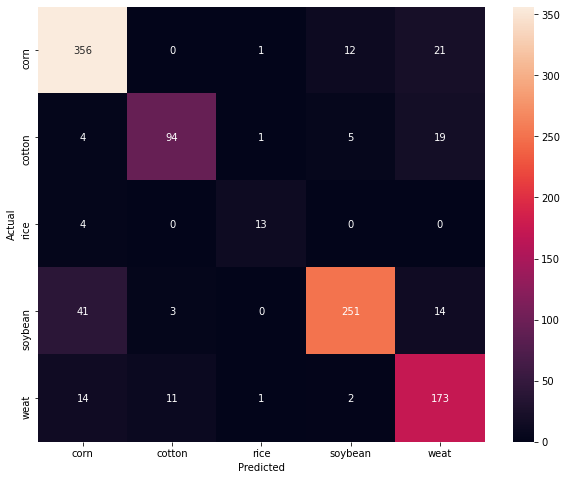

In [243]:
conf_mat = confusion_matrix(z_test, prediction)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=validation_labels, yticklabels=validation_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

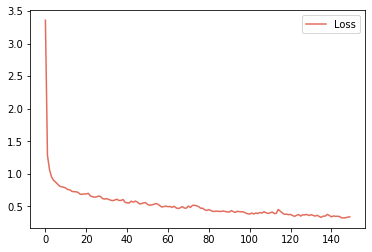

In [197]:
plt.plot(history.history['loss'], label='Loss')
plt.legend();

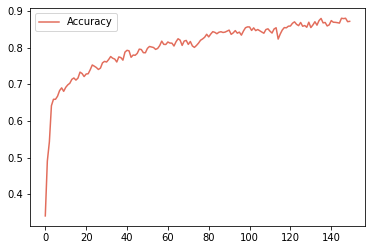

In [194]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend();